In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import datasets 
datasets.logging.set_verbosity_error()
import nltk
import re
from nltk.tokenize import word_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tag import pos_tag
from nltk.help import upenn_tagset
from collections import Counter
from nltk.corpus import wordnet
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,log_loss, f1_score,accuracy_score, precision_recall_fscore_support
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()
from joblib import load, dump
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')




c:\Users\w11\anaconda3\envs\nlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\w11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\w11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\w11\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\w11\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
review_af = pd.DataFrame(load_dataset("McAuley-Lab/Amazon-Reviews-2023",  "raw_review_Amazon_Fashion" , split="full" , trust_remote_code=True))

In [3]:
df_review_af = pd.DataFrame(review_af)
df_review_af.head()

rating                 title  \
0     5.0         Pretty locket   
1     5.0                     A   
2     2.0             Two Stars   
3     1.0       Won’t buy again   
4     5.0  I LOVE these glasses   

                                                text images        asin  \
0  I think this locket is really pretty. The insi...     []  B00LOPVX74   
1                                              Great     []  B07B4JXK8D   
2  One of the stones fell out within the first 2 ...     []  B007ZSEQ4Q   
3  Crappy socks. Money wasted. Bought to wear wit...     []  B07F2BTFS9   
4  I LOVE these glasses!  They fit perfectly over...     []  B00PKRFU4O   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  1578528394489             3   
1  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  1608426246701             0   
2  B007ZSEQ4Q  AHITBJSS7KYUBVZPX7M2WJCOIVKQ  1432344828000             3   
3  B07F2BTFS9  AFVNEEPDEIH5SPUN5BWC6NKL3WNQ  1546289847095             2   
4  B00XESJTDE  AHSPLDNW5OOUK2PLH7GXLACFBZNQ  1439476166000             0   

   verified_purchase  
0               True  
1               True  
2               True  
3               True  
4               True

In [4]:
meta_af = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Amazon_Fashion", split="full", trust_remote_code=True)

In [5]:
pd.set_option("display.max_columns", None)
df_meta_af = pd.DataFrame(meta_af)
df_meta_af.head()

main_category                                              title  \
0  AMAZON FASHION  YUEDGE 5 Pairs Men's Moisture Control Cushione...   
1  AMAZON FASHION  DouBCQ Women's Palazzo Lounge Wide Leg Casual ...   
2  AMAZON FASHION  Pastel by Vivienne Honey Vanilla Girls' Trapez...   
3  AMAZON FASHION                                   Mento Streamtail   
4  AMAZON FASHION  RONNOX Women's 3-Pairs Bright Colored Calf Com...   

   average_rating  rating_number  \
0             4.6             16   
1             4.1              7   
2             4.3             11   
3             2.0              1   
4             4.3           3032   

                                            features  \
0                                                 []   
1                 [Drawstring closure, Machine Wash]   
2                   [Zipper closure, Hand Wash Only]   
3  [Thermoplastic Rubber sole, High Density Premi...   
4  [Pull On closure, Size Guide: "S" fits calf 10...   

                                         description  price  \
0                                                 []   None   
1                                                 []   None   
2                                                 []   None   
3  [Slip on the Women's Mento and you're ready to...  29.81   
4  [Ronnox Calf Sleeves - Allowing Your Body to P...  17.99   

                                              images  \
0  {'hi_res': ['https://m.media-amazon.com/images...   
1  {'hi_res': ['https://m.media-amazon.com/images...   
2  {'hi_res': ['https://m.media-amazon.com/images...   
3  {'hi_res': ['https://m.media-amazon.com/images...   
4  {'hi_res': ['https://m.media-amazon.com/images...   

                                              videos               store  \
0            {'title': [], 'url': [], 'user_id': []}            GiveGift   
1            {'title': [], 'url': [], 'user_id': []}              DouBCQ   
2            {'title': [], 'url': [], 'user_id': []}  Pastel by Vivienne   
3            {'title': [], 'url': [], 'user_id': []}          Guy Harvey   
4  {'title': ['HONEST Review: RONNOX Women's 3-Pa...              RONNOX   

  categories                                            details parent_asin  \
0         []  {"Package Dimensions": "10.31 x 8.5 x 1.73 inc...  B08BHN9PK5   
1         []  {"Package Dimensions": "15 x 10.2 x 0.4 inches...  B08R39MRDW   
2         []  {"Is Discontinued By Manufacturer": "No", "Pac...  B077KJHCJ4   
3         []  {"Package Dimensions": "11.22 x 4.72 x 4.33 in...  B0811M2JG9   
4         []  {"Is Discontinued By Manufacturer": "No", "Pac...  B07SB2892S   

  bought_together subtitle author  
0            None     None   None  
1            None     None   None  
2            None     None   None  
3            None     None   None  
4            None     None   None

In [170]:
all_df = df_review_af.merge(df_meta_af, on = "parent_asin", how= 'left')

In [171]:
all_df.head(5)

rating               title_x  \
0     5.0         Pretty locket   
1     5.0                     A   
2     2.0             Two Stars   
3     1.0       Won’t buy again   
4     5.0  I LOVE these glasses   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
1                                              Great       []  B07B4JXK8D   
2  One of the stones fell out within the first 2 ...       []  B007ZSEQ4Q   
3  Crappy socks. Money wasted. Bought to wear wit...       []  B07F2BTFS9   
4  I LOVE these glasses!  They fit perfectly over...       []  B00PKRFU4O   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  1578528394489             3   
1  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  1608426246701             0   
2  B007ZSEQ4Q  AHITBJSS7KYUBVZPX7M2WJCOIVKQ  1432344828000             3   
3  B07F2BTFS9  AFVNEEPDEIH5SPUN5BWC6NKL3WNQ  1546289847095             2   
4  B00XESJTDE  AHSPLDNW5OOUK2PLH7GXLACFBZNQ  1439476166000             0   

   verified_purchase   main_category  \
0               True  AMAZON FASHION   
1               True  AMAZON FASHION   
2               True  AMAZON FASHION   
3               True  AMAZON FASHION   
4               True  AMAZON FASHION   

                                             title_y  average_rating  \
0  CHUVORA 925 Sterling Silver Open Celtic Knot C...             4.3   
1  XX-Large Slip Stop Single Tread Slipper Socks ...             4.3   
2  Sterling Silver 3mm Round Cut CZ Tennis Bracel...             3.3   
3  VERO MONTE 4 Pairs Womens TRULY No Show Socks ...             4.0   
4  SA106 Womens Rhinestone Jewel Polarized Lens 6...             3.9   

   rating_number                                           features  \
0            137  [STAMPED 925 STERLING SILVER - This high quali...   
1           3096  [Cozy Slipper Socks For Men; Bariatric Slipper...   
2             18                                                 []   
3             58                                     [Machine Wash]   
4             34  [Imported, Plastic frame, anti-reflective lens...   

                                         description  price  \
0  [This beautiful jewelry would be a great addit...   30.0   
1  [Anyone looking for the best in single tread s...  20.99   
2                                                 []   None   
3                                                 []   None   
4  [Men's anti-glare lens sunglasses 100% UVA & U...  12.95   

                                            images_y  \
0  {'hi_res': ['https://m.media-amazon.com/images...   
1  {'hi_res': ['https://m.media-amazon.com/images...   
2  {'hi_res': ['https://m.media-amazon.com/images...   
3  {'hi_res': ['https://m.media-amazon.com/images...   
4  {'hi_res': ['https://m.media-amazon.com/images...   

                                              videos       store categories  \
0  {'title': ['Irish Locket Celtic Locket Necklac...     CHUVORA         []   
1            {'title': [], 'url': [], 'user_id': []}    PrimeMed         []   
2            {'title': [], 'url': [], 'user_id': []}       KEZEF         []   
3            {'title': [], 'url': [], 'user_id': []}  VERO MONTE         []   
4            {'title': [], 'url': [], 'user_id': []}       SA106         []   

                                             details bought_together subtitle  \
0  {"Is Discontinued By Manufacturer": "No", "Pro...            None     None   
1  {"Is Discontinued By Manufacturer": "No", "Pac...            None     None   
2  {"Material": "not-applicable", "Brand": "KEZEF...            None     None   
3  {"Is Discontinued By Manufacturer": "No", "Pro...            None     None   
4  {"Is Discontinued By Manufacturer": "No", "Ite...            None     None   

  author  
0   None  
1   None  
2   None  
3   None  
4   None

In [172]:
all_df['main_category'].value_counts()

main_category
AMAZON FASHION    2500939
Name: count, dtype: int64

In [173]:
all_df['categories'].value_counts()

categories
[]    2500939
Name: count, dtype: int64

In [174]:
all_df['store'].value_counts()

store
NELEUS        15432
Romwe         10955
Casio          9874
Nike           8969
CHUVORA        8645
              ...  
YOU and me        1
ZHXuan            1
Dependable        1
Btysmile          1
hsimnsi           1
Name: count, Length: 89678, dtype: int64

In [175]:
all_df['store'].nunique()

89678

In [176]:
all_df['rating'].value_counts(normalize = True)

rating
5.0    0.570293
4.0    0.140878
1.0    0.121319
3.0    0.098152
2.0    0.069359
Name: proportion, dtype: float64

In [177]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500939 entries, 0 to 2500938
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title_x            object 
 2   text               object 
 3   images_x           object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
 10  main_category      object 
 11  title_y            object 
 12  average_rating     float64
 13  rating_number      int64  
 14  features           object 
 15  description        object 
 16  price              object 
 17  images_y           object 
 18  videos             object 
 19  store              object 
 20  categories         object 
 21  details            object 
 22  bought_together    object 
 23  subtitle           object 
 24  author             object 
dtypes: bool(1), float6

In [178]:
all_df[['title_x','title_y']][:1]

title_x                                            title_y
0  Pretty locket  CHUVORA 925 Sterling Silver Open Celtic Knot C...

In [179]:
all_df['text'][0]

'I think this locket is really pretty. The inside back is a solid silver depression and the front is a dome that is not solid (knotted). You could use it to store a small photo, lock of hair, etc but I use it when I need to carry medication with me. Closes securely. High quality & very pretty.'

In [180]:
all_df.rename( columns = {'title_x':'title_review'}, inplace = True)
all_df.rename( columns = {'text':'text_review'}, inplace = True)
all_df.rename( columns = {'title_y':'title_product'}, inplace = True)

In [181]:
pd.set_option("display.max_columns", None)
all_df.head(15)

rating                                       title_review  \
0      5.0                                      Pretty locket   
1      5.0                                                  A   
2      2.0                                          Two Stars   
3      1.0                                    Won’t buy again   
4      5.0                               I LOVE these glasses   
5      3.0                 Adult friendly; Not for small kids   
6      5.0                                         Five Stars   
7      4.0  Heavy earrings for size of owls but so darn cute!   
8      5.0                                  Bright and summer   
9      2.0                                           Scratchy   
10     2.0                                          Two Stars   
11     5.0                                My Kid loves these!   
12     2.0                              Not what was expected   
13     5.0                                         Nice shirt   
14     3.0                           Not for the large busted   

                                          text_review images_x        asin  \
0   I think this locket is really pretty. The insi...       []  B00LOPVX74   
1                                               Great       []  B07B4JXK8D   
2   One of the stones fell out within the first 2 ...       []  B007ZSEQ4Q   
3   Crappy socks. Money wasted. Bought to wear wit...       []  B07F2BTFS9   
4   I LOVE these glasses!  They fit perfectly over...       []  B00PKRFU4O   
5   Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
6                                           Great fit       []  B01MZDN9Z4   
7   Would be five stars but they are just too heav...       []  B00N9X4XNU   
8   What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
9   Very inexpensive, but too rough and uncomforta...       []  B0799L7FMC   
10                   Runs way smaller than indicated.       []  B077GN3YZJ   
11  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   
12  There are lots of raw edges.  Not well made.  ...       []  B09DQ5M2BB   
13  I really liked this shirt when I received it. ...       []  B095M3HHTJ   
14  If you are large chested, this isn’t for you. ...       []  B089PWHFVW   

   parent_asin                       user_id      timestamp  helpful_vote  \
0   B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  1578528394489             3   
1   B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  1608426246701             0   
2   B007ZSEQ4Q  AHITBJSS7KYUBVZPX7M2WJCOIVKQ  1432344828000             3   
3   B07F2BTFS9  AFVNEEPDEIH5SPUN5BWC6NKL3WNQ  1546289847095             2   
4   B00XESJTDE  AHSPLDNW5OOUK2PLH7GXLACFBZNQ  1439476166000             0   
5   B089S8MFCQ  AHTTU2FL6FCNBBAESCJHOHHSSW7A  1603306686690             0   
6   B01MZDN9Z4  AFWHJ6O3PV4JC7PVOJH6CPULO2KQ  1497119249157             0   
7   B00N9X4XNU  AEWJXW46LKSW22FWTGRYTLNE7TGA  1543584620566             0   
8   B087M39LVV  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ  1642721894143             0   
9   B0799L7FMC  AFNT6ZJCYQN3WDIKUSWHJDXNND2Q  1532728417117             0   
10  B077GN3YZJ  AF232QQ7UDHGQOVR6LZ3X7ZVQ3ZA  1514216248827             0   
11  B091GMMYPS  AEVPPTMG43C6GWSR7I2UGRQN7WFQ  1644000508824             0   
12  B09DQ5M2BB  AHREXOGQPZDA6354MHH4ETSF3MCQ  1634791843960             1   
13  B095M3HHTJ  AHREXOGQPZDA6354MHH4ETSF3MCQ  1629080264160             1   
14  B089PWHFVW  AHREXOGQPZDA6354MHH4ETSF3MCQ  1628867386110             0   

    verified_purchase   main_category  \
0                True  AMAZON FASHION   
1                True  AMAZON FASHION   
2                True  AMAZON FASHION   
3                True  AMAZON FASHION   
4                True  AMAZON FASHION   
5                True  AMAZON FASHION   
6                True  AMAZON FASHION   
7                True  AMAZON FASHION   
8                True  AMAZON FASHION   
9                True  AMAZON FASHION   
10               True  AMAZON 

In [182]:
all_df['text_review'].iloc[10]

'Runs way smaller than indicated.'

In [183]:
all_smaller = all_df[['rating', 'title_review', 'text_review', 'timestamp', 'helpful_vote', 'verified_purchase', 'title_product', 'price', 'rating_number','average_rating']]
all_smaller.head()

rating          title_review  \
0     5.0         Pretty locket   
1     5.0                     A   
2     2.0             Two Stars   
3     1.0       Won’t buy again   
4     5.0  I LOVE these glasses   

                                         text_review      timestamp  \
0  I think this locket is really pretty. The insi...  1578528394489   
1                                              Great  1608426246701   
2  One of the stones fell out within the first 2 ...  1432344828000   
3  Crappy socks. Money wasted. Bought to wear wit...  1546289847095   
4  I LOVE these glasses!  They fit perfectly over...  1439476166000   

   helpful_vote  verified_purchase  \
0             3               True   
1             0               True   
2             3               True   
3             2               True   
4             0               True   

                                       title_product  price  rating_number  \
0  CHUVORA 925 Sterling Silver Open Celtic Knot C...   30.0            137   
1  XX-Large Slip Stop Single Tread Slipper Socks ...  20.99           3096   
2  Sterling Silver 3mm Round Cut CZ Tennis Bracel...   None             18   
3  VERO MONTE 4 Pairs Womens TRULY No Show Socks ...   None             58   
4  SA106 Womens Rhinestone Jewel Polarized Lens 6...  12.95             34   

   average_rating  
0             4.3  
1             4.3  
2             3.3  
3             4.0  
4             3.9

In [184]:
all_smaller.isnull().sum()

rating               0
title_review         0
text_review          0
timestamp            0
helpful_vote         0
verified_purchase    0
title_product        0
price                0
rating_number        0
average_rating       0
dtype: int64

In [185]:
all_smaller[all_smaller['rating'] == 3.0]

rating                                       title_review  \
5           3.0                 Adult friendly; Not for small kids   
14          3.0                           Not for the large busted   
32          3.0                        Quality made but runs small   
35          3.0                           2021 Graduation bracelet   
36          3.0  One pair had a hole in crotch straight out of ...   
...         ...                                                ...   
2500883     3.0            You may want to go up a size on the top   
2500892     3.0  When I washed it after I w Unexplainable black...   
2500901     3.0  But the coat is nice my daughter said it is re...   
2500907     3.0                                     Decent I guess   
2500936     3.0                            Not checked for quality   

                                               text_review      timestamp  \
5        Works OK for adults and is not at all kid frie...  1603306686690   
14       If you are large chested, this isn’t for you. ...  1628867386110   
32       Nicely made, lightweight windbreaker. Easily f...  1549712804435   
35       It is very pretty. But it is easy to break if ...  1608040912340   
36       Editing my review. I put on the second pair of...  1621569573063   
...                                                    ...            ...   
2500883  Very cute outfit overall but the top fits smal...  1594650209181   
2500892  I really like the outfit but after one wash th...  1655309218810   
2500901  I wear a large. I purchased a xl to wear a swe...  1452900487000   
2500907  I've used this product only on my white vans t...  1556726331344   
2500936  When I received them 2-3 of them did not open ...  1482013711000   

         helpful_vote  verified_purchase  \
5                   0               True   
14                  0              False   
32                  0              False   
35                  0               True   
36                  0               True   
...               ...                ...   
2500883             0               True   
2500892             1               True   
2500901             0               True   
2500907             0              False   
2500936             0               True   

                                             title_product  price  \
5        Neck Gaiter for Kids Face Cover Scarf Neck Gai...   None   
14       Upopby Women's Sleeveless Sundress Summer Casu...   None   
32       Truity Men's Sports Jacket Hooded Lightweight ...   None   
35       Graduation Gifts for Her 2021, College High Sc...   None   
36       O2 Collection Women Black Solid Cotton Span Hi...   None   
...                                                    ...    ...   
2500883  EOSIEDUR Women 2 Piece Summer Outfits Short Sl...  26.99   
2500892  EOSIEDUR Women 2 Piece Summer Outfits Short Sl...  26.99   
2500901  Valuker Women's Down Coat With Fur Hood 90D Pa...   None   
2500907  CleanKicks Shoe Cleaner Kit - Solution & Brush...   None   
2500936  Set of 10 Tie Clips - Elegant Designs (tc10b) ...   None   

         rating_number  average_rating  
5                   26             3.8  
14                   8             3.1  
32                   8             3.4  
35                  11             4.3  
36                   1             3.0  
...                ...             ...  
2500883            826             4.0  
2500892            826             4.0  
2500901             60             3.2  
2500907             93             4.3  
2500936            240             4.5  

[245471 rows x 10 columns]

In [186]:
all_smaller.text_review[2500883]

'Very cute outfit overall but the top fits small even though i choose a 2XL. Shorts fit fine though.'

In [187]:
all_smaller.text_review[36]

"Editing my review. I put on the second pair of capri leggings this morning and new in the pack, the crotch had a hole in it where the seem wasn't sewn together right"

In [188]:
all_smaller.text_review[32]

'Nicely made, lightweight windbreaker. Easily folds up for taking backpacking or even just sightseeing (in case of a random shower). Where this falls short is in the sizing. This runs very small. My son is thin but tends to wear a large (due to his height), he had difficulty zipping this up (was too tight on him). If  you buy this, definitely size up. Not sure he will ever wear this due to the fit, I may take for use for myself when traveling.'

In [189]:
all_smaller['sentiment'] = all_smaller['rating'].apply(lambda x: 2 if x >= 4 else 1 if x == 3 else 0)

C:\Users\w11\AppData\Local\Temp\ipykernel_816\1206410310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_smaller['sentiment'] = all_smaller['rating'].apply(lambda x: 2 if x >= 4 else 1 if x == 3 else 0)


In [190]:
all_smaller[all_smaller['rating'] == 2.0]

rating              title_review  \
2           2.0                 Two Stars   
9           2.0                  Scratchy   
10          2.0                 Two Stars   
12          2.0     Not what was expected   
40          2.0  Not fashionable for sure   
...         ...                       ...   
2500837     2.0                 Too small   
2500842     2.0          VERY VERY SHEER.   
2500890     2.0             Run too small   
2500902     2.0       Cute but runs small   
2500920     2.0        I do not recommend   

                                               text_review      timestamp  \
2        One of the stones fell out within the first 2 ...  1432344828000   
9        Very inexpensive, but too rough and uncomforta...  1532728417117   
10                        Runs way smaller than indicated.  1514216248827   
12       There are lots of raw edges.  Not well made.  ...  1634791843960   
40       The lenses pop out occasionally, not a fashion...  1596561236317   
...                                                    ...            ...   
2500837                                        Nice fabric  1532745034934   
2500842  Extremely sheer, fell apart the first time I w...  1433536053000   
2500890  I dislike the fabric, but the color was very n...  1657733915769   
2500902  Coat was very cute, but it was way too small. ...  1452268463000   
2500920                        This item fits like a mess.  1541617281371   

         helpful_vote  verified_purchase  \
2                   3               True   
9                   0               True   
10                  0               True   
12                  1               True   
40                  0               True   
...               ...                ...   
2500837             0               True   
2500842             0               True   
2500890             0               True   
2500902             1               True   
2500920             0               True   

                                             title_product  price  \
2        Sterling Silver 3mm Round Cut CZ Tennis Bracel...   None   
9        ULTPEAK Dog Bark Control Anti Bark 50 FT Range...   None   
10       SSLR Women's Christmas Tropical Button Down Sh...   None   
12       snugwind Women's Waffle V Neck Tunic Peplum Fa...   None   
40       COFFLED 5pcs Anti Fog - Goggles Lab Safety - H...   None   
...                                                    ...    ...   
2500837  Forthery Women Cold Shoulder Tunic Tops Summer...   None   
2500842  E.JAN1ST Women's Suspender Skirts Basic High W...   None   
2500890  EOSIEDUR Women 2 Piece Summer Outfits Short Sl...  26.99   
2500902  Valuker Women's Down Coat With Fur Hood 90D Pa...   None   
2500920  levaca Womens Summer Plain Short Sleeve Scoop ...   None   

         rating_number  average_rating  sentiment  
2                   18             3.3          0  
9                  133             4.0          0  
10                   1             2.0          0  
12                   2             2.3          0  
40                 142             3.8          0  
...                ...             ...        ...  
2500837            277             3.5          0  
2500842             28             3.4          0  
2500890            826             4.0          0  
2500902             60             3.2          0  
2500920             22             3.7          0  

[173462 rows x 11 columns]

In [191]:
all_smaller.head()

rating          title_review  \
0     5.0         Pretty locket   
1     5.0                     A   
2     2.0             Two Stars   
3     1.0       Won’t buy again   
4     5.0  I LOVE these glasses   

                                         text_review      timestamp  \
0  I think this locket is really pretty. The insi...  1578528394489   
1                                              Great  1608426246701   
2  One of the stones fell out within the first 2 ...  1432344828000   
3  Crappy socks. Money wasted. Bought to wear wit...  1546289847095   
4  I LOVE these glasses!  They fit perfectly over...  1439476166000   

   helpful_vote  verified_purchase  \
0             3               True   
1             0               True   
2             3               True   
3             2               True   
4             0               True   

                                       title_product  price  rating_number  \
0  CHUVORA 925 Sterling Silver Open Celtic Knot C...   30.0            137   
1  XX-Large Slip Stop Single Tread Slipper Socks ...  20.99           3096   
2  Sterling Silver 3mm Round Cut CZ Tennis Bracel...   None             18   
3  VERO MONTE 4 Pairs Womens TRULY No Show Socks ...   None             58   
4  SA106 Womens Rhinestone Jewel Polarized Lens 6...  12.95             34   

   average_rating  sentiment  
0             4.3          2  
1             4.3          2  
2             3.3          0  
3             4.0          0  
4             3.9          2

In [192]:
all_smaller.price.isnull().sum()

0

In [193]:
all_smaller['price'] = all_smaller['price'].replace({'None': np.nan})
all_smaller.price.isnull().sum()

C:\Users\w11\AppData\Local\Temp\ipykernel_816\427241462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_smaller['price'] = all_smaller['price'].replace({'None': np.nan})


2067191

In [194]:
all_smaller

rating                                       title_review  \
0           5.0                                      Pretty locket   
1           5.0                                                  A   
2           2.0                                          Two Stars   
3           1.0                                    Won’t buy again   
4           5.0                               I LOVE these glasses   
...         ...                                                ...   
2500934     5.0  ... allowed them to be used to add military ri...   
2500935     1.0                           Didn’t come with all ten   
2500936     3.0                            Not checked for quality   
2500937     5.0                                            Awesome   
2500938     1.0                                  Empty plastic bag   

                                               text_review      timestamp  \
0        I think this locket is really pretty. The insi...  1578528394489   
1                                                    Great  1608426246701   
2        One of the stones fell out within the first 2 ...  1432344828000   
3        Crappy socks. Money wasted. Bought to wear wit...  1546289847095   
4        I LOVE these glasses!  They fit perfectly over...  1439476166000   
...                                                    ...            ...   
2500934  The tie tacks were the size that allowed them ...  1466799158000   
2500935          Says ten tie clips but o only received 7.  1525799105585   
2500936  When I received them 2-3 of them did not open ...  1482013711000   
2500937                                     Great product.  1492277666000   
2500938  I got an empty bag in my package of 10 that I ...  1489537502000   

         helpful_vote  verified_purchase  \
0                   3               True   
1                   0               True   
2                   3               True   
3                   2               True   
4                   0               True   
...               ...                ...   
2500934             0               True   
2500935             0               True   
2500936             0               True   
2500937             1               True   
2500938             1               True   

                                             title_product  price  \
0        CHUVORA 925 Sterling Silver Open Celtic Knot C...   30.0   
1        XX-Large Slip Stop Single Tread Slipper Socks ...  20.99   
2        Sterling Silver 3mm Round Cut CZ Tennis Bracel...    NaN   
3        VERO MONTE 4 Pairs Womens TRULY No Show Socks ...    NaN   
4        SA106 Womens Rhinestone Jewel Polarized Lens 6...  12.95   
...                                                    ...    ...   
2500934  Set of 10 Tie Clips - Elegant Designs (tc10b) ...    NaN   
2500935  Set of 10 Tie Clips - Elegant Designs (tc10b) ...    NaN   
2500936  Set of 10 Tie Clips - Elegant Designs (tc10b) ...    NaN   
2500937  Set of 10 Tie Clips - Elegant Designs (tc10b) ...    NaN   
2500938  Set of 10 Tie Clips - Elegant Designs (tc10b) ...    NaN   

         rating_number  average_rating  sentiment  
0                  137             4.3          2  
1                 3096             4.3          2  
2                   18             3.3          0  
3                   58             4.0          0  
4                   34             3.9          2  
...                ...             ...        ...  
2500934            240             4.5          2  
2500935            240             4.5          0  
2500936            240             4.5          1  
2500937            240             4.5          2  
2500938            240             4.5          0  

[2500939 rows x 11 columns]

In [195]:
for col in   all_smaller.columns:
    all_smaller[col] =  all_smaller[col].replace({'None' : np.nan})

C:\Users\w11\AppData\Local\Temp\ipykernel_816\3612000177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_smaller[col] =  all_smaller[col].replace({'None' : np.nan})


In [196]:
all_smaller.isnull().sum()

rating                     0
title_review             202
text_review              141
timestamp                  0
helpful_vote               0
verified_purchase          0
title_product              0
price                2067191
rating_number              0
average_rating             0
sentiment                  0
dtype: int64

In [197]:
all_smaller = all_smaller.drop(columns= ['price','rating','title_review','timestamp','verified_purchase'])

In [198]:
all_smaller.dropna(inplace= True)

In [199]:
all_smaller.isnull().sum()

text_review       0
helpful_vote      0
title_product     0
rating_number     0
average_rating    0
sentiment         0
dtype: int64

# Delete the filter for real metric's

In [200]:
all_smaller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500798 entries, 0 to 2500938
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   text_review     object 
 1   helpful_vote    int64  
 2   title_product   object 
 3   rating_number   int64  
 4   average_rating  float64
 5   sentiment       int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 133.6+ MB


In [201]:
all_smaller.head(10)

text_review  helpful_vote  \
0  I think this locket is really pretty. The insi...             3   
1                                              Great             0   
2  One of the stones fell out within the first 2 ...             3   
3  Crappy socks. Money wasted. Bought to wear wit...             2   
4  I LOVE these glasses!  They fit perfectly over...             0   
5  Works OK for adults and is not at all kid frie...             0   
6                                          Great fit             0   
7  Would be five stars but they are just too heav...             0   
8  What a cute top! Cam wait to wear in warm weat...             0   
9  Very inexpensive, but too rough and uncomforta...             0   

                                       title_product  rating_number  \
0  CHUVORA 925 Sterling Silver Open Celtic Knot C...            137   
1  XX-Large Slip Stop Single Tread Slipper Socks ...           3096   
2  Sterling Silver 3mm Round Cut CZ Tennis Bracel...             18   
3  VERO MONTE 4 Pairs Womens TRULY No Show Socks ...             58   
4  SA106 Womens Rhinestone Jewel Polarized Lens 6...             34   
5  Neck Gaiter for Kids Face Cover Scarf Neck Gai...             26   
6  PUMA Men's IT Evotrg Graphic Tee True Blue/Bri...              1   
7  joyliveCY Women Charm Jewerly Rose Gold Plated...            166   
8                            Twotwowin womens Casual             74   
9  ULTPEAK Dog Bark Control Anti Bark 50 FT Range...            133   

   average_rating  sentiment  
0             4.3          2  
1             4.3          2  
2             3.3          0  
3             4.0          0  
4             3.9          2  
5             3.8          1  
6             5.0          2  
7             4.1          2  
8             3.7          2  
9             4.0          0

In [202]:
all_smaller.text_review.iloc[0]

'I think this locket is really pretty. The inside back is a solid silver depression and the front is a dome that is not solid (knotted). You could use it to store a small photo, lock of hair, etc but I use it when I need to carry medication with me. Closes securely. High quality & very pretty.'

In [203]:
all_smaller.text_review.iloc[3]

'Crappy socks. Money wasted. Bought to wear with my tieks. Don’t stay on feet well.'

In [204]:
all_smaller.title_product.iloc[3]

'VERO MONTE 4 Pairs Womens TRULY No Show Socks (Black, 7.5-9), Black, Size 7.5'

In [205]:
all_smaller.title_product.iloc[0]

'CHUVORA 925 Sterling Silver Open Celtic Knot Circle Round Pendant Locket with Photo Necklace for Women, 18 inches'

In [206]:
all_smaller =  all_smaller[:6000]

In [207]:
all_smaller.to_pickle('all_smaller.pkl')

In [208]:
first_comment = all_smaller.text_review.iloc[0]
tokenized = word_tokenize(first_comment)
Counter(tokenized).most_common(10)

[('.', 5),
 ('is', 4),
 ('I', 3),
 ('a', 3),
 ('pretty', 2),
 ('solid', 2),
 ('use', 2),
 ('it', 2),
 ('to', 2),
 (',', 2)]

In [209]:
first_comment_lower = word_tokenize(first_comment.lower())
first_comment_lower

['i',
 'think',
 'this',
 'locket',
 'is',
 'really',
 'pretty',
 '.',
 'the',
 'inside',
 'back',
 'is',
 'a',
 'solid',
 'silver',
 'depression',
 'and',
 'the',
 'front',
 'is',
 'a',
 'dome',
 'that',
 'is',
 'not',
 'solid',
 '(',
 'knotted',
 ')',
 '.',
 'you',
 'could',
 'use',
 'it',
 'to',
 'store',
 'a',
 'small',
 'photo',
 ',',
 'lock',
 'of',
 'hair',
 ',',
 'etc',
 'but',
 'i',
 'use',
 'it',
 'when',
 'i',
 'need',
 'to',
 'carry',
 'medication',
 'with',
 'me',
 '.',
 'closes',
 'securely',
 '.',
 'high',
 'quality',
 '&',
 'very',
 'pretty',
 '.']

In [210]:
stop_words = [word for word in first_comment_lower if word not in stopwords.words('english') ]
stop_words

['think',
 'locket',
 'really',
 'pretty',
 '.',
 'inside',
 'back',
 'solid',
 'silver',
 'depression',
 'front',
 'dome',
 'solid',
 '(',
 'knotted',
 ')',
 '.',
 'could',
 'use',
 'store',
 'small',
 'photo',
 ',',
 'lock',
 'hair',
 ',',
 'etc',
 'use',
 'need',
 'carry',
 'medication',
 '.',
 'closes',
 'securely',
 '.',
 'high',
 'quality',
 '&',
 'pretty',
 '.']

In [211]:
no_punct = [re.sub(r'[^\w\s]', '', word) for word in stop_words]
no_punct_space = [word for word in no_punct if word]
no_punct_space

['think',
 'locket',
 'really',
 'pretty',
 'inside',
 'back',
 'solid',
 'silver',
 'depression',
 'front',
 'dome',
 'solid',
 'knotted',
 'could',
 'use',
 'store',
 'small',
 'photo',
 'lock',
 'hair',
 'etc',
 'use',
 'need',
 'carry',
 'medication',
 'closes',
 'securely',
 'high',
 'quality',
 'pretty']

In [212]:
pos_tagged = pos_tag(no_punct_space)
pos_tagged

[('think', 'NN'),
 ('locket', 'NN'),
 ('really', 'RB'),
 ('pretty', 'JJ'),
 ('inside', 'IN'),
 ('back', 'RB'),
 ('solid', 'JJ'),
 ('silver', 'NN'),
 ('depression', 'NN'),
 ('front', 'JJ'),
 ('dome', 'NN'),
 ('solid', 'JJ'),
 ('knotted', 'VBN'),
 ('could', 'MD'),
 ('use', 'VB'),
 ('store', 'RB'),
 ('small', 'JJ'),
 ('photo', 'NN'),
 ('lock', 'NN'),
 ('hair', 'NN'),
 ('etc', 'FW'),
 ('use', 'NN'),
 ('need', 'NN'),
 ('carry', 'VBP'),
 ('medication', 'NN'),
 ('closes', 'NNS'),
 ('securely', 'RB'),
 ('high', 'JJ'),
 ('quality', 'NN'),
 ('pretty', 'RB')]

In [213]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
lemitizated = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(tag)) for word,tag in pos_tagged]
lemitizated

['think',
 'locket',
 'really',
 'pretty',
 'inside',
 'back',
 'solid',
 'silver',
 'depression',
 'front',
 'dome',
 'solid',
 'knot',
 'could',
 'use',
 'store',
 'small',
 'photo',
 'lock',
 'hair',
 'etc',
 'use',
 'need',
 'carry',
 'medication',
 'close',
 'securely',
 'high',
 'quality',
 'pretty']

In [214]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
lemitizated = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(tag)) for word,tag in pos_tagged]
lemitizated

['think',
 'locket',
 'really',
 'pretty',
 'inside',
 'back',
 'solid',
 'silver',
 'depression',
 'front',
 'dome',
 'solid',
 'knot',
 'could',
 'use',
 'store',
 'small',
 'photo',
 'lock',
 'hair',
 'etc',
 'use',
 'need',
 'carry',
 'medication',
 'close',
 'securely',
 'high',
 'quality',
 'pretty']

In [215]:
verbs = [word for word, pos in  pos_tag(lemitizated) if pos == 'NN']
verbs

['think',
 'locket',
 'silver',
 'depression',
 'dome',
 'knot',
 'photo',
 'lock',
 'hair',
 'use',
 'need',
 'medication',
 'quality']

## All Regulization Functions

In [216]:
lower = lambda x: str(x.lower())

def stop_words(text):
    text = [word for word in word_tokenize(text) if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

def regex(text):
    # Sayıları, alfabenin dışındaki karakterleri ve '@' işaretini kaldır
    text = [re.sub(r'[^a-zA-Z\s]', '', word) for word in word_tokenize(text)]
    text = [word for word in text if word]
    text = ' '.join(text)
    return text

def correct_spelling(text):
    text_blob = TextBlob(text)
    corrected_text = str(text_blob.correct())
    return corrected_text

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    pos_tagged = pos_tag(word_tokenize(text))
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged]
    return ' '.join(lemmatized)

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return pd.Series([polarity, subjectivity])



In [217]:
all_smaller.text_review =  all_smaller.text_review.map(lower).map(correct_spelling).map(regex).map(stop_words).map(lemmatize)
all_smaller.text_review

0       think locket really pretty inside back solid s...
1                                                   great
2       one stone fell within first week wear stone sm...
3       happy sock money waste buy wear tie stay foot ...
4       love glass fit perfectly regular rectangular g...
                              ...                        
5995    perfect lift quality amaze product come perfec...
5996    star item style pattern super cut material thi...
5997    mmm absolutely adorable amaze gift anyone pean...
5998    really good want change strap color feel like ...
5999    simple yet stun color simply beautiful sun lig...
Name: text_review, Length: 6000, dtype: object

In [218]:
all_smaller.title_product =  all_smaller.title_product.map(lower).map(correct_spelling).map(regex).map(stop_words).map(lemmatize)
all_smaller.title_product

0       chuvora sterling silver open celtic knot circl...
1       xxlarge slip stop single tread slipper sock pa...
2       sterling silver mmm round cut c tennis bracele...
3       month pair woman truly show socks black black ...
4       sa woman rhinestone jewel polarize lens mmm fi...
                              ...                        
5995    sister gift sister sterling silver two bead ne...
5996    box woman alicia high waist check sunk mind sk...
5997    couple keychians peanuts butter jelly keychain...
5998    anatyu band compatible fitbit versaversa fitbi...
5999        may may do ask gold fill inspiration necklace
Name: title_product, Length: 6000, dtype: object

In [219]:
all_smaller[['polarity', 'subjectivity']] = all_smaller['text_review'].apply(get_sentiment)

In [220]:
##all_smaller['polarity'] = all_smaller['polarity']+1
##all_smaller['subjectivity'] = all_smaller['subjectivity']+1

In [221]:
all_smaller.text_review.iloc[0]

'think locket really pretty inside back solid silver depression front dome solid knot could use store small photo lock hair etc use need carry meditation close securely high quality pretty'

In [222]:
all_smaller.text_review.iloc[5]

'work ok adult kid friendly state side year old face'

In [223]:
all_smaller.title_product.iloc[120]

'hero casual dress woman summer army xlarge'

In [224]:
all_smaller.text_review.iloc[27]

'org starwise earn absolutely chest earring ever wear light paste color go anything picture clear colourful well make perfect size ear worn twice already night dressed jean receive ton compliment ask get great highly recommend'

### TFIDF Vectorizer

In [225]:
vektorizer = TfidfVectorizer(stop_words='english', min_df = 0.008, ngram_range=(1,3), token_pattern="\\b[a-z][a-z][a-z]+\\b")
vektorized = vektorizer.fit_transform(all_smaller.text_review)
tfidf = pd.DataFrame(vektorized.toarray(),columns=vektorizer.get_feature_names_out(), index=all_smaller.index)
tfidf.head(5)

able  absolutely  actually  add  adjust  adjustable  adorable  adult  \
0   0.0         0.0       0.0  0.0     0.0         0.0       0.0    0.0   
1   0.0         0.0       0.0  0.0     0.0         0.0       0.0    0.0   
2   0.0         0.0       0.0  0.0     0.0         0.0       0.0    0.0   
3   0.0         0.0       0.0  0.0     0.0         0.0       0.0    0.0   
4   0.0         0.0       0.0  0.0     0.0         0.0       0.0    0.0   

   allow  amazon  ankle  apart  appear  area  arm  arrive  attach  attractive  \
0    0.0     0.0    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   
1    0.0     0.0    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   
2    0.0     0.0    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   
3    0.0     0.0    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   
4    0.0     0.0    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   

   away  awesome  bad  bag  band  bar  bar size  bar size wear  base  \
0   0.0      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0   
1   0.0      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0   
2   0.0      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0   
3   0.0      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0   
4   0.0      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0   

   beautiful  belt  best  big  bit  bite  black  blend  blue  body  boot  box  \
0        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
1        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
2        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
3        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
4        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   

   bracelet  brand  break  breathable  bright  bust  button       buy  card  \
0       0.0    0.0    0.0         0.0     0.0   0.0     0.0  0.000000   0.0   
1       0.0    0.0    0.0         0.0     0.0   0.0     0.0  0.000000   0.0   
2       0.0    0.0    0.0         0.0     0.0   0.0     0.0  0.000000   0.0   
3       0.0    0.0    0.0         0.0     0.0   0.0     0.0  0.287903   0.0   
4       0.0    0.0    0.0         0.0     0.0   0.0     0.0  0.152703   0.0   

   care     carry  case  casual  cause  chain  change  chart  cheap  chest  \
0   0.0  0.260083   0.0     0.0    0.0    0.0     0.0    0.0    0.0    0.0   
1   0.0  0.000000   0.0     0.0    0.0    0.0     0.0    0.0    0.0    0.0   
2   0.0  0.000000   0.0     0.0    0.0    0.0     0.0    0.0    0.0    0.0   
3   0.0  0.000000   0.0     0.0    0.0    0.0     0.0    0.0    0.0    0.0   
4   0.0  0.000000   0.0     0.0    0.0    0.0     0.0    0.0    0.0    0.0   

   child  choice  christmas  class  clean  clean thought  clean thought trend  \
0    0.0     0.0        0.0    0.0    0.0            0.0                  0.0   
1    0.0     0.0        0.0    0.0    0.0            0.0                  0.0   
2    0.0     0.0        0.0    0.0    0.0            0.0                  0.0   
3    0.0     0.0        0.0    0.0    0.0            0.0                  0.0   
4    0.0     0.0        0.0    0.0    0.0            0.0                  0.0   

      close  clothes  clothing  coat  cold  color  come  come package  \
0  0.241698      0.0       0.0   0.0   0.0    0.0   0.0           0.0   
1  0.000000      0.0       0.0   0.0   0.0    0.0   0.0           0.0   
2  0.000000      0.0       0.0   0.0   0.0    0.0   0.0           0.0   
3  0.000000      0.0       0.0   0.0   0.0    0.0   0.0           0.0   
4  0.000000      0.0       0.0   0.0   0.0    0.0   0.0           0.0   

   comfort  comfortable  comfortable fit  comfortable fit okay  \
0      0.0          0.0              0.0                   0.0   
1      0.0          0.0              0.0                   0.0   
2      0.0          0.0              0.0                   0.0   
3      0.0 

In [226]:
tfidf.shape

(6000, 610)

In [227]:
col_names = tfidf.columns.tolist()
print(col_names)

['able', 'absolutely', 'actually', 'add', 'adjust', 'adjustable', 'adorable', 'adult', 'allow', 'amazon', 'ankle', 'apart', 'appear', 'area', 'arm', 'arrive', 'attach', 'attractive', 'away', 'awesome', 'bad', 'bag', 'band', 'bar', 'bar size', 'bar size wear', 'base', 'beautiful', 'belt', 'best', 'big', 'bit', 'bite', 'black', 'blend', 'blue', 'body', 'boot', 'box', 'bracelet', 'brand', 'break', 'breathable', 'bright', 'bust', 'button', 'buy', 'card', 'care', 'carry', 'case', 'casual', 'cause', 'chain', 'change', 'chart', 'cheap', 'chest', 'child', 'choice', 'christmas', 'class', 'clean', 'clean thought', 'clean thought trend', 'close', 'clothes', 'clothing', 'coat', 'cold', 'color', 'come', 'come package', 'comfort', 'comfortable', 'comfortable fit', 'comfortable fit okay', 'comfortable wear', 'company', 'compliment', 'compression', 'consider', 'cool', 'costume', 'cotton', 'couple', 'course', 'cover', 'coverage', 'cup', 'cut', 'cut dress', 'dark', 'daughter', 'daughter love', 'day', 'd

In [228]:
all_data = pd.concat([all_smaller, tfidf], axis = 1)
all_data.head(5)

text_review  helpful_vote  \
0  think locket really pretty inside back solid s...             3   
1                                              great             0   
2  one stone fell within first week wear stone sm...             3   
3  happy sock money waste buy wear tie stay foot ...             2   
4  love glass fit perfectly regular rectangular g...             0   

                                       title_product  rating_number  \
0  chuvora sterling silver open celtic knot circl...            137   
1  xxlarge slip stop single tread slipper sock pa...           3096   
2  sterling silver mmm round cut c tennis bracele...             18   
3  month pair woman truly show socks black black ...             58   
4  sa woman rhinestone jewel polarize lens mmm fi...             34   

   average_rating  sentiment  polarity  subjectivity  able  absolutely  \
0             4.3          2  0.058571      0.448571   0.0         0.0   
1             4.3          2  0.800000      0.750000   0.0         0.0   
2             3.3          0  0.000000      0.366667   0.0         0.0   
3             4.0          0  0.300000      0.500000   0.0         0.0   
4             3.9          2  0.283766      0.533067   0.0         0.0   

   actually  add  adjust  adjustable  adorable  adult  allow  amazon  ankle  \
0       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
1       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
2       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
3       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
4       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   

   apart  appear  area  arm  arrive  attach  attractive  away  awesome  bad  \
0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
1    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
2    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
3    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
4    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   

   bag  band  bar  bar size  bar size wear  base  beautiful  belt  best  big  \
0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
1  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
2  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
3  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
4  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   

   bit  bite  black  blend  blue  body  boot  box  bracelet  brand  break  \
0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
1  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
2  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
3  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
4  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   

   breathable  bright  bust  button       buy  card  care     carry  case  \
0         0.0     0.0   0.0     0.0  0.000000   0.0   0.0  0.260083   0.0   
1         0.0     0.0   0.0     0.0  0.000000   0.0   0.0  0.000000   0.0   
2         0.0     0.0   0.0     0.0  0.000000   0.0   0.0  0.000000   0.0   
3         0.0     0.0   0.0     0.0  0.287903   0.0   0.0  0.000000   0.0   
4         0.0     0.0   0.0     0.0  0.152703   0.0   0.0  0.000000   0.0   

   casual  cause  chain  change  chart  cheap  chest  child  choice  \
0     0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
1     0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
2     0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
3     0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
4     0.0    0.0    0.0     0.0    0

In [229]:
all_data[all_data['text_review'].str.len() < 10]

text_review  helpful_vote  \
1          great             0   
6      great fit             0   
22      fit well             0   
26           cut             0   
37           cut             0   
...          ...           ...   
5902       great             0   
5903       thank             0   
5907        love             0   
5920     get pay             0   
5928   super cut             0   

                                          title_product  rating_number  \
1     xxlarge slip stop single tread slipper sock pa...           3096   
6     pump men votre graphic true bluebright plasma ...              1   
22    comfortable adjustable gothic louisa board art...              3   
26    girl linen casual dress summer flora tank shif...              1   
37    holy rise gold dainty different language love ...              1   
...                                                 ...            ...   
5902  ohio state football fan tour stop gray tshirt ...              8   
5903  carter baby boys piece alligator snug fit cott...              6   
5907  real love girl pack vneck shirt size wash yell...              5   
5920  exquisite woman sterling silver ring oval cut ...              4   
5928  sector baby girl dress rabbit sleepless tut pr...              4   

      average_rating  sentiment  polarity  subjectivity  able  absolutely  \
1                4.3          2  0.800000      0.750000   0.0         0.0   
6                5.0          2  0.600000      0.575000   0.0         0.0   
22               5.0          2  0.400000      0.400000   0.0         0.0   
26               5.0          2  0.000000      0.000000   0.0         0.0   
37               5.0          2  0.000000      0.000000   0.0         0.0   
...              ...        ...       ...           ...   ...         ...   
5902             4.4          2  0.800000      0.750000   0.0         0.0   
5903             5.0          2  0.000000      0.000000   0.0         0.0   
5907             3.2          2  0.500000      0.600000   0.0         0.0   
5920             2.4          0  0.000000      0.000000   0.0         0.0   
5928             5.0          2  0.333333      0.666667   0.0         0.0   

      actually  add  adjust  adjustable  adorable  adult  allow  amazon  \
1          0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
6          0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
22         0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
26         0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
37         0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
...        ...  ...     ...         ...       ...    ...    ...     ...   
5902       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
5903       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
5907       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
5920       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
5928       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   

      ankle  apart  appear  area  arm  arrive  attach  attractive  away  \
1       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
6       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
22      0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
26      0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
37      0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
...     ...    ...     ...   ...  ...     ...     ...         ...   ...   
5902    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5903    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5907    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5920    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5928    0.0    0.0     0.0   0.0  0.0     0.0     0.0   

In [230]:
all_data.text_review.iloc[5]

'work ok adult kid friendly state side year old face'

# Topic Modeling For Product Title

In [231]:
vectorizer = CountVectorizer(ngram_range=(1,3), min_df=0.002, token_pattern="\\b[a-z][a-z]+\\b") # token_pattern = içerisinde en az 2 karakter geçen kelimeleri al
doc_word = vectorizer.fit_transform(all_data.title_product)
pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names_out() ,index=all_data.index)

accessory  acrylic  active  activewear  activity  add  adjustable  \
0             0        0       0           0         0    0           0   
1             0        0       0           0         0    0           0   
2             0        0       0           0         0    0           0   
3             0        0       0           0         0    0           0   
4             0        0       0           0         0    0           0   
...         ...      ...     ...         ...       ...  ...         ...   
5995          0        0       0           0         0    0           0   
5996          0        0       0           0         0    0           0   
5997          0        0       0           0         0    0           0   
5998          0        0       0           0         0    0           0   
5999          0        0       0           0         0    0           0   

      adjustable strap  adrian  adult  age  agent  aimless  aline  allegro  \
0                    0       0      0    0      0        0      0        0   
1                    0       0      0    0      0        0      0        0   
2                    0       0      0    0      0        0      0        0   
3                    0       0      0    0      0        0      0        0   
4                    0       0      0    0      0        0      0        0   
...                ...     ...    ...  ...    ...      ...    ...      ...   
5995                 0       0      0    0      0        0      0        0   
5996                 0       0      0    0      0        0      0        0   
5997                 0       0      0    0      0        0      0        0   
5998                 0       0      0    0      0        0      0        0   
5999                 0       0      0    0      0        0      0        0   

      allow  allude  allude woman  american  analogy  angel  angle  \
0         0       0             0         0        0      0      0   
1         0       0             0         0        0      0      0   
2         0       0             0         0        0      0      0   
3         0       0             0         0        0      0      0   
4         0       0             0         0        0      0      0   
...     ...     ...           ...       ...      ...    ...    ...   
5995      0       0             0         0        0      0      0   
5996      0       0             0         0        0      0      0   
5997      0       0             0         0        0      0      0   
5998      0       0             0         0        0      0      0   
5999      0       0             0         0        0      0      0   

      angle bracelet  angle drop  angle earring  animal  ankle  anna  \
0                  0           0              0       0      0     0   
1                  0           0              0       0      0     0   
2                  0           0              0       0      0     0   
3                  0           0              0       0      0     0   
4                  0           0              0       0      0     0   
...              ...         ...            ...     ...    ...   ...   
5995               0           0              0       0      0     0   
5996               0           0              0       0      0     0   
5997               0           0              0       0      0     0   
5998               0           0              0       0      0     0   
5999               0           0              0       0      0     0   

      anniversary  anti  anti glare  antique  apparel  apple  apple watch  \
0               0     0           0        0        0      0            0   
1               0     0           0        0        0      0            0   
2               0     0           0        0        0      0            0   
3               0     0           0        0        0      0            0   
4               0     0           0        0        0      0            0   


In [232]:
n_components = list(range(1,60))
explained_variances  = []
for n in n_components:
    lsa = TruncatedSVD(n_components=n)
    lsa.fit(doc_word)
    explained_variances.append(lsa.explained_variance_ratio_.sum())

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variances, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Topics')
plt.show()

In [234]:
optimal_n_components = 3  # Optimum topic 
lsa = TruncatedSVD(n_components=optimal_n_components)
doc_topic = lsa.fit_transform(doc_word)
doc_topic

array([[ 0.98090753, -1.16123127, -0.78579768],
       [ 0.11926456, -0.13045878,  0.02808047],
       [ 0.2244644 , -0.79614603,  0.24857528],
       ...,
       [ 0.0995892 , -0.28578736, -0.19824657],
       [ 1.00835251, -0.85166086,  0.86291917],
       [ 0.1192373 , -0.46289602, -0.29528425]])

In [235]:
topic_word_matrix = pd.DataFrame(lsa.components_.round(3),
                                 index=["Topic " + str(i) for i in range(1, 4)],
                                 columns=vectorizer.get_feature_names_out())
topic_word_matrix

accessory  acrylic  active  activewear  activity    add  adjustable  \
Topic 1      0.005    0.003   0.006       0.003     0.001  0.003       0.017   
Topic 2     -0.012   -0.004  -0.006      -0.003    -0.002 -0.003      -0.038   
Topic 3      0.003   -0.002   0.011      -0.000     0.003 -0.001       0.010   

         adjustable strap  adrian  adult    age  agent  aimless  aline  \
Topic 1             0.002   0.002  0.004  0.000  0.002    0.003  0.014   
Topic 2            -0.001  -0.009 -0.006 -0.001  0.001   -0.005  0.012   
Topic 3             0.002  -0.003  0.002  0.000  0.001    0.001  0.003   

         allegro  allow  allude  allude woman  american  analogy  angel  \
Topic 1    0.002  0.003   0.005         0.005     0.002    0.002  0.001   
Topic 2    0.001 -0.008   0.004         0.004    -0.001   -0.007 -0.002   
Topic 3   -0.000 -0.004   0.001         0.001     0.000    0.014 -0.002   

         angle  angle bracelet  angle drop  angle earring  animal  ankle  \
Topic 1  0.014           0.001       0.002          0.004   0.004  0.011   
Topic 2 -0.044          -0.004      -0.005         -0.013  -0.010 -0.018   
Topic 3 -0.022          -0.002      -0.003         -0.008  -0.007 -0.004   

          anna  anniversary   anti  anti glare  antique  apparel  apple  \
Topic 1  0.003        0.003  0.004       0.001    0.001    0.002  0.005   
Topic 2 -0.002       -0.012 -0.007      -0.002   -0.005   -0.001 -0.030   
Topic 3 -0.001       -0.010  0.001       0.000   -0.003    0.000  0.082   

         apple watch  apple watch band   arch  arch row  arch row woman  \
Topic 1        0.004             0.003  0.008     0.006           0.005   
Topic 2       -0.029            -0.021 -0.009    -0.006          -0.005   
Topic 3        0.082             0.058 -0.004    -0.004          -0.003   

         arch support    arm   army  army green  around    art    ask  \
Topic 1         0.002  0.001  0.009       0.006   0.001  0.002  0.012   
Topic 2        -0.002 -0.002  0.001       0.004  -0.001 -0.003 -0.050   
Topic 3         0.000  0.002  0.005       0.003   0.001 -0.002 -0.026   

         ask gold  ask gold place  ask white  ask white gold  assert  \
Topic 1     0.008           0.006      0.003           0.003   0.001   
Topic 2    -0.031          -0.026     -0.009          -0.009  -0.004   
Topic 3    -0.022          -0.019     -0.005          -0.005  -0.001   

         athletic  athletic run  athletic run nursing  automatic  autumn  \
Topic 1     0.016         0.003                 0.002      0.001   0.003   
Topic 2    -0.015        -0.005                -0.004     -0.002   0.002   
Topic 3     0.011         0.001                 0.001      0.005   0.000   

         awesome  awesome men  awesome men cotton   baby  baby boy  baby girl  \
Topic 1    0.001        0.001               0.001  0.005     0.001      0.001   
Topic 2   -0.001       -0.002              -0.001  0.000    -0.000      0.001   
Topic 3    0.004        0.004               0.003  0.000     0.000     -0.000   

         babydoll   back  backpack    bag  bag woman  baggy  baker  balaclava  \
Topic 1     0.004  0.009     0.002  0.023      0.005  0.003  0.003      0.003   
Topic 2     0.003 -0.003    -0.002 -0.033     -0.006 -0.000 -0.001     -0.003   
Topic 3     0.000  0.001     0.001 -0.004     -0.002 -0.000  0.000      0.002   

          ball  bamboo  banana   band  band compatible  \
Topic 1  0.004   0.002   0.004  0.020            0.004   
Topic 2 -0.010  -0.001  -0.004 -0.101           -0.020   
Topic 3  0.003   0.000   0.003  0.241            0.051   

         band compatible fitbit  band mmm  band mmm mmm  bandage    bar  \
Topic 1                   0.002     0.003         0.003    0.004  0.023   
Topic 2                  -0.005    -0.025        -0.020   -0.001 -0.029   
Topic 3                   0.007     0.069         0.059    0.000  0.000   

         bar purple   base  baseball  baseball cap  basic   bath  bath suit  \
Topic 1       0.002  0.001     0.

In [236]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("Topic ", ix)
        else:
            print("Topic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [237]:
display_topics(lsa, vectorizer.get_feature_names_out(), 4)


Topic  0
woman, dress, sleeve, casual
Topic  1
dress, sleeve, casual, long
Topic  2
mmm, watch, mmm mmm, band


In [238]:
dominant_topic = doc_topic.argmax(axis=1)
topic_labels = ["Topic " + str(i+1) for i in dominant_topic]

In [239]:
all_data = all_data.copy()
all_data['dominant_topic'] = topic_labels

In [240]:
all_data['dominant_topic'].unique()

array(['Topic 1', 'Topic 3', 'Topic 2'], dtype=object)

In [241]:
all_data.head(3)

text_review  helpful_vote  \
0  think locket really pretty inside back solid s...             3   
1                                              great             0   
2  one stone fell within first week wear stone sm...             3   

                                       title_product  rating_number  \
0  chuvora sterling silver open celtic knot circl...            137   
1  xxlarge slip stop single tread slipper sock pa...           3096   
2  sterling silver mmm round cut c tennis bracele...             18   

   average_rating  sentiment  polarity  subjectivity  able  absolutely  \
0             4.3          2  0.058571      0.448571   0.0         0.0   
1             4.3          2  0.800000      0.750000   0.0         0.0   
2             3.3          0  0.000000      0.366667   0.0         0.0   

   actually  add  adjust  adjustable  adorable  adult  allow  amazon  ankle  \
0       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
1       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
2       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   

   apart  appear  area  arm  arrive  attach  attractive  away  awesome  bad  \
0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
1    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
2    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   

   bag  band  bar  bar size  bar size wear  base  beautiful  belt  best  big  \
0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
1  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
2  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   

   bit  bite  black  blend  blue  body  boot  box  bracelet  brand  break  \
0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
1  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
2  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   

   breathable  bright  bust  button  buy  card  care     carry  case  casual  \
0         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.260083   0.0     0.0   
1         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.000000   0.0     0.0   
2         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.000000   0.0     0.0   

   cause  chain  change  chart  cheap  chest  child  choice  christmas  class  \
0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   
1    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   
2    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   

   clean  clean thought  clean thought trend     close  clothes  clothing  \
0    0.0            0.0                  0.0  0.241698      0.0       0.0   
1    0.0            0.0                  0.0  0.000000      0.0       0.0   
2    0.0            0.0                  0.0  0.000000      0.0       0.0   

   coat  cold  color  come  come package  comfort  comfortable  \
0   0.0   0.0    0.0   0.0           0.0      0.0          0.0   
1   0.0   0.0    0.0   0.0           0.0      0.0          0.0   
2   0.0   0.0    0.0   0.0           0.0      0.0          0.0   

   comfortable fit  comfortable fit okay  comfortable wear  company  \
0              0.0                   0.0               0.0      0.0   
1              0.0                   0.0               0.0      0.0   
2              0.0                   0.0               0.0      0.0   

   compliment  compression  consider  cool  costume  cotton  couple  course  \
0         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   
1         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   
2         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   

   cover  coverage  cup  cut  cut dress  dark  daughter  daughter love  day  \
0    0.0     

In [242]:

all_data['len_rew'] = all_data['text_review'].apply(lambda x: len(str(x).split()))


In [243]:
dummy = pd.get_dummies(all_data['dominant_topic'], drop_first= True, dtype=int)
dummy_df = pd.concat([all_data,dummy], axis = 1)
dummy_df.head(3)

text_review  helpful_vote  \
0  think locket really pretty inside back solid s...             3   
1                                              great             0   
2  one stone fell within first week wear stone sm...             3   

                                       title_product  rating_number  \
0  chuvora sterling silver open celtic knot circl...            137   
1  xxlarge slip stop single tread slipper sock pa...           3096   
2  sterling silver mmm round cut c tennis bracele...             18   

   average_rating  sentiment  polarity  subjectivity  able  absolutely  \
0             4.3          2  0.058571      0.448571   0.0         0.0   
1             4.3          2  0.800000      0.750000   0.0         0.0   
2             3.3          0  0.000000      0.366667   0.0         0.0   

   actually  add  adjust  adjustable  adorable  adult  allow  amazon  ankle  \
0       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
1       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   
2       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0    0.0   

   apart  appear  area  arm  arrive  attach  attractive  away  awesome  bad  \
0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
1    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   
2    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0      0.0  0.0   

   bag  band  bar  bar size  bar size wear  base  beautiful  belt  best  big  \
0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
1  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   
2  0.0   0.0  0.0       0.0            0.0   0.0        0.0   0.0   0.0  0.0   

   bit  bite  black  blend  blue  body  boot  box  bracelet  brand  break  \
0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
1  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   
2  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0       0.0    0.0    0.0   

   breathable  bright  bust  button  buy  card  care     carry  case  casual  \
0         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.260083   0.0     0.0   
1         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.000000   0.0     0.0   
2         0.0     0.0   0.0     0.0  0.0   0.0   0.0  0.000000   0.0     0.0   

   cause  chain  change  chart  cheap  chest  child  choice  christmas  class  \
0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   
1    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   
2    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0        0.0    0.0   

   clean  clean thought  clean thought trend     close  clothes  clothing  \
0    0.0            0.0                  0.0  0.241698      0.0       0.0   
1    0.0            0.0                  0.0  0.000000      0.0       0.0   
2    0.0            0.0                  0.0  0.000000      0.0       0.0   

   coat  cold  color  come  come package  comfort  comfortable  \
0   0.0   0.0    0.0   0.0           0.0      0.0          0.0   
1   0.0   0.0    0.0   0.0           0.0      0.0          0.0   
2   0.0   0.0    0.0   0.0           0.0      0.0          0.0   

   comfortable fit  comfortable fit okay  comfortable wear  company  \
0              0.0                   0.0               0.0      0.0   
1              0.0                   0.0               0.0      0.0   
2              0.0                   0.0               0.0      0.0   

   compliment  compression  consider  cool  costume  cotton  couple  course  \
0         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   
1         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   
2         0.0          0.0       0.0   0.0      0.0     0.0     0.0     0.0   

   cover  coverage  cup  cut  cut dress  dark  daughter  daughter love  day  \
0    0.0     

In [244]:
x = dummy_df.drop(['text_review','title_product','dominant_topic','sentiment','average_rating'], axis = 1)
y = dummy_df.sentiment

In [245]:
##from sklearn.preprocessing import LabelEncoder
##label_encoder = LabelEncoder()
##y = pd.DataFrame(label_encoder.fit_transform(y))

In [246]:
x

helpful_vote  rating_number  polarity  subjectivity  able  absolutely  \
0                3            137  0.058571      0.448571   0.0    0.000000   
1                0           3096  0.800000      0.750000   0.0    0.000000   
2                3             18  0.000000      0.366667   0.0    0.000000   
3                2             58  0.300000      0.500000   0.0    0.000000   
4                0             34  0.283766      0.533067   0.0    0.000000   
...            ...            ...       ...           ...   ...         ...   
5995             0             21  0.392500      0.833333   0.0    0.000000   
5996             0              1  0.043333      0.444167   0.0    0.000000   
5997             0             13  0.420000      0.933333   0.0    0.504052   
5998             0             16  0.358333      0.483333   0.0    0.000000   
5999             0              4  0.525000      0.764286   0.0    0.000000   

      actually  add  adjust  adjustable  adorable  adult  allow  amazon  \
0          0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
1          0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
2          0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
3          0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
4          0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
...        ...  ...     ...         ...       ...    ...    ...     ...   
5995       0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
5996       0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
5997       0.0  0.0     0.0         0.0  0.266177    0.0    0.0     0.0   
5998       0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   
5999       0.0  0.0     0.0         0.0  0.000000    0.0    0.0     0.0   

      ankle  apart  appear  area  arm  arrive  attach  attractive  away  \
0       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
1       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
2       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
3       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
4       0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
...     ...    ...     ...   ...  ...     ...     ...         ...   ...   
5995    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5996    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5997    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5998    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5999    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   

      awesome       bad  bag      band  bar  bar size  bar size wear  base  \
0         0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
1         0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
2         0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
3         0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
4         0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
...       ...       ...  ...       ...  ...       ...            ...   ...   
5995      0.0  0.359579  0.0  0.000000  0.0       0.0            0.0   0.0   
5996      0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   
5997      0.0  0.242816  0.0  0.000000  0.0       0.0            0.0   0.0   
5998      0.0  0.000000  0.0  0.316853  0.0       0.0            0.0   0.0   
5999      0.0  0.000000  0.0  0.000000  0.0       0.0            0.0   0.0   

      beautiful  belt  best       big  bit  bite  black  blend  blue  body  \
0      0.000000   0.0   0.0  0.000000  0.0   0.0    0.0    0.0   0.0   0.0   
1      0.000000   0.0   0.0  0.000000  0.0   0.0    0.0    0.0   0.0   0.0   
2      0.000000   0.0   0.0  0.000000  0.0   0.0    0.0    0.0   0.0   0.0   
3     

In [247]:
y

0       2
1       2
2       0
3       0
4       2
       ..
5995    2
5996    2
5997    2
5998    2
5999    2
Name: sentiment, Length: 6000, dtype: int64

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [249]:
x_train.head()

helpful_vote  rating_number  polarity  subjectivity  able  absolutely  \
2847             0            171  0.297500      0.621111   0.0         0.0   
4336             1              3  0.247917      0.641667   0.0         0.0   
3386             1             16  0.200000      0.323810   0.0         0.0   
1721             0             16  0.450000      0.600000   0.0         0.0   
2404             1              2  0.358333      0.654167   0.0         0.0   

      actually  add  adjust  adjustable  adorable  adult  allow  amazon  \
2847       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
4336       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
3386       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
1721       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
2404       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   

      ankle  apart  appear      area       arm  arrive  attach  attractive  \
2847    0.0    0.0     0.0  0.000000  0.000000     0.0     0.0         0.0   
4336    0.0    0.0     0.0  0.000000  0.000000     0.0     0.0         0.0   
3386    0.0    0.0     0.0  0.000000  0.210098     0.0     0.0         0.0   
1721    0.0    0.0     0.0  0.000000  0.000000     0.0     0.0         0.0   
2404    0.0    0.0     0.0  0.160865  0.000000     0.0     0.0         0.0   

      away   awesome  bad       bag  band  bar  bar size  bar size wear  base  \
2847   0.0  0.161741  0.0  0.517971   0.0  0.0       0.0            0.0   0.0   
4336   0.0  0.000000  0.0  0.000000   0.0  0.0       0.0            0.0   0.0   
3386   0.0  0.000000  0.0  0.000000   0.0  0.0       0.0            0.0   0.0   
1721   0.0  0.000000  0.0  0.000000   0.0  0.0       0.0            0.0   0.0   
2404   0.0  0.000000  0.0  0.000000   0.0  0.0       0.0            0.0   0.0   

      beautiful  belt  best  big  bit  bite  black  blend  blue      body  \
2847        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
4336        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
3386        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
1721        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
2404        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.485421   

      boot  box  bracelet  brand  break  breathable    bright  bust  button  \
2847   0.0  0.0       0.0    0.0    0.0         0.0  0.000000   0.0     0.0   
4336   0.0  0.0       0.0    0.0    0.0         0.0  0.000000   0.0     0.0   
3386   0.0  0.0       0.0    0.0    0.0         0.0  0.212948   0.0     0.0   
1721   0.0  0.0       0.0    0.0    0.0         0.0  0.000000   0.0     0.0   
2404   0.0  0.0       0.0    0.0    0.0         0.0  0.000000   0.0     0.0   

           buy  card  care  carry      case  casual     cause  chain  change  \
2847  0.104117   0.0   0.0    0.0  0.000000     0.0  0.340968    0.0     0.0   
4336  0.219311   0.0   0.0    0.0  0.000000     0.0  0.000000    0.0     0.0   
3386  0.000000   0.0   0.0    0.0  0.210098     0.0  0.000000    0.0     0.0   
1721  0.000000   0.0   0.0    0.0  0.000000     0.0  0.000000    0.0     0.0   
2404  0.000000   0.0   0.0    0.0  0.000000     0.0  0.000000    0.0     0.0   

      chart  cheap  chest  child  choice  christmas  class  clean  \
2847    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
4336    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
3386    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
1721    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
2404    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   

      clean thought  clean thought trend  close  clothes  clothing  coat  \
2847            0.0                  0.0    0.0      0.0       0.0   0.0   
4336            0.0                  0.0    0.0      0.0       0.0   0.0   
3386            0.0                  0.0    0.0      0.0      

In [250]:
x_train.shape

(4500, 617)

In [251]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV Model
grid_search.fit(x_train, y_train)

# Best Accuracy Score and Parameters
print("Best Params:", grid_search.best_params_)
print("Best  Score:", grid_search.best_score_)

# Retrain model with best parameters on the entire training data
best_params = grid_search.best_params_
xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

# Predict for test using the best model
y_pred_xgb_best = xgb_model.predict(x_test)
y_prob_xgb_best = xgb_model.predict_proba(x_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
f1_score_xgb_best = f1_score(y_test, y_pred_xgb_best, average='macro')
print(f'XGB Best Model accuracy (Macro): {accuracy_xgb_best}')
print(f'XGB f1 Score: {f1_score_xgb_best}')
print('XGB Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred_xgb_best))

# Displaying Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2' ],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best  Score: 0.8057777777777778
XGB Best Model accuracy (Macro): 0.8033333333333333
XGB f1 Score: 0.5000343852604113
XGB Confusion Matrix: 

 [[  79   11  102]
 [  26   11  118]
 [  28   10 1115]]


## SMOTE Over Sampling 

In [252]:
from imblearn.over_sampling import SMOTE
x_trainf_float = x_train.astype('float64')
smote = SMOTE(k_neighbors=10)  # En düşük değer
x_smoted, y_smoted = smote.fit_resample(x_trainf_float, y_train)

In [253]:
Counter(y_smoted)

Counter({2: 3451, 0: 3451, 1: 3451})

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best  Score: 0.9152032321196556
XGB Best Model accuracy (Macro): 0.7826666666666666
XGB f1 Score: 0.5318500710370752
XGB Confusion Matrix: 

 [[ 101   22   69]
 [  32   23  100]
 [  67   36 1050]]


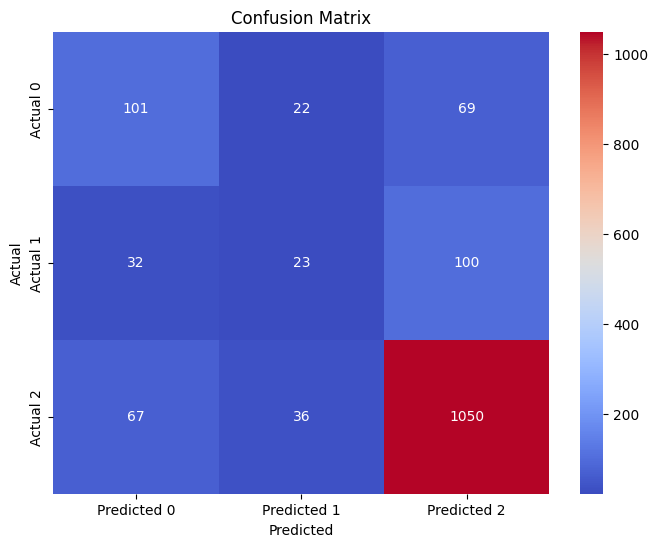

In [254]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV Model
grid_search.fit(x_smoted, y_smoted)

# Best Accuracy Score and Parameters
print("Best Params:", grid_search.best_params_)
print("Best  Score:", grid_search.best_score_)

# Retrain model with best parameters on the entire training data
best_params = grid_search.best_params_
xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_smoted, y_smoted)

# Predict for test using the best model
y_pred_xgb_best = xgb_model.predict(x_test)
y_prob_xgb_best = xgb_model.predict_proba(x_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
f1_score_xgb_best = f1_score(y_test, y_pred_xgb_best, average='macro')
print(f'XGB Best Model accuracy (Macro): {accuracy_xgb_best}')
print(f'XGB f1 Score: {f1_score_xgb_best}')
print('XGB Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred_xgb_best))

# Displaying Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2' ],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [255]:
pd.DataFrame(y_test).value_counts()

sentiment
2            1153
0             192
1             155
Name: count, dtype: int64

In [256]:
x_denme = x_train.iloc[0].to_frame().T
xgb_model.predict(x_denme)

array([2], dtype=int64)

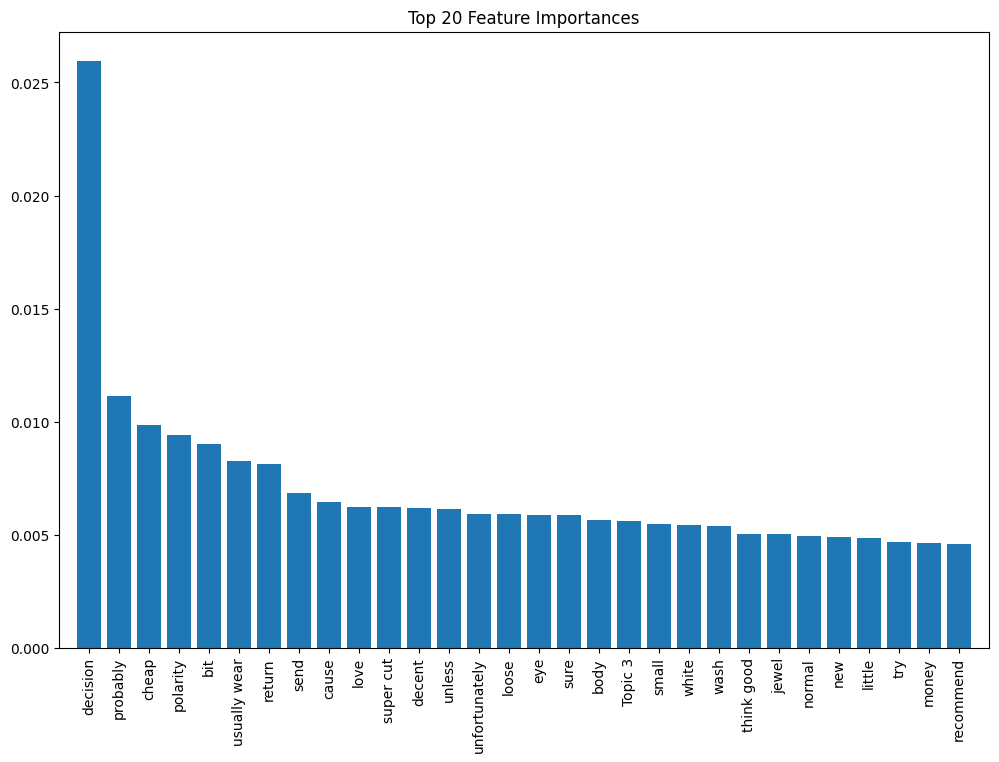

In [257]:
f_imp = xgb_model.feature_importances_
indices = np.argsort(f_imp)[::-1][:30]  # Most Important 20 Features
top_features = [x_train.columns[i] for i in indices]
top_importances = f_imp[indices]
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances")
plt.bar(range(len(top_features)), top_importances, align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlim([-1, len(top_features)])
plt.show()

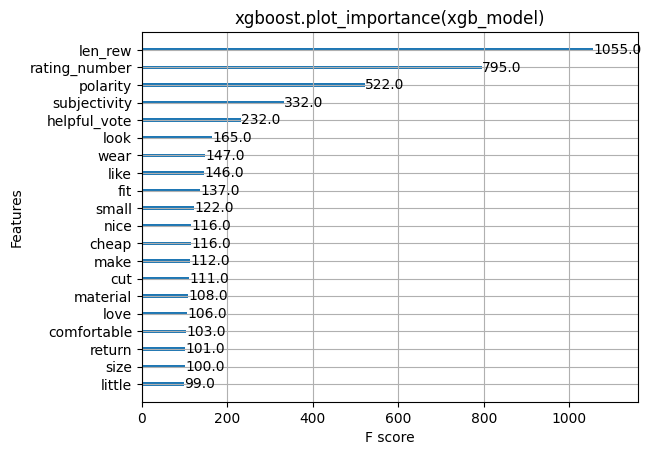

In [258]:
import xgboost as xgb
xgb.plot_importance(xgb_model, max_num_features=20)
plt.title("xgboost.plot_importance(xgb_model)")
plt.show()

## Explainable AI XGBoost Best Model

In [259]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(x_test)

In [260]:
shap_values[0]

.values =
array([[-0.01105377,  0.01503216,  0.13655505],
       [ 0.13904911,  0.00865378, -0.00477893],
       [-0.27955884,  0.03136225, -0.50809926],
       ...,
       [-0.31966844, -0.12133733,  0.5597145 ],
       [-0.00127418,  0.        ,  0.        ],
       [ 0.00266819, -0.03637436,  0.00472065]], dtype=float32)

.base_values =
array([0.44496432, 0.55590355, 0.45612043], dtype=float32)

.data =
array([ 0.        ,  4.        ,  0.14285714,  0.62857143,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.    

In [261]:
x_test.join(y_test)

helpful_vote  rating_number  polarity  subjectivity  able  absolutely  \
1782             0              4  0.142857      0.628571   0.0         0.0   
3917             0             63  0.000000      0.000000   0.0         0.0   
221              1             31  0.285897      0.591026   0.0         0.0   
2135             0              7  0.566667      0.566667   0.0         0.0   
5224             0             11  0.500000      0.500000   0.0         0.0   
...            ...            ...       ...           ...   ...         ...   
2337             0              2  0.261622      0.658025   0.0         0.0   
3515             0              7  0.200000      0.425000   0.0         0.0   
4519             0             39  0.566667      0.708333   0.0         0.0   
5910             0             87  0.383333      0.666667   0.0         0.0   
4713             0            147  0.150000      0.050000   0.0         0.0   

      actually       add  adjust  adjustable  adorable  adult  allow  amazon  \
1782  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
3917  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
221   0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
2135  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
5224  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
...        ...       ...     ...         ...       ...    ...    ...     ...   
2337  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
3515  0.187337  0.182655     0.0         0.0       0.0    0.0    0.0     0.0   
4519  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
5910  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
4713  0.000000  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   

      ankle  apart  appear  area  arm  arrive  attach  attractive  away  \
1782    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
3917    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
221     0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
2135    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5224    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
...     ...    ...     ...   ...  ...     ...     ...         ...   ...   
2337    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
3515    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
4519    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5910    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
4713    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   

      awesome  bad  bag  band  bar  bar size  bar size wear  base  beautiful  \
1782      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
3917      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
221       0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
2135      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
5224      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
...       ...  ...  ...   ...  ...       ...            ...   ...        ...   
2337      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
3515      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
4519      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
5910      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   
4713      0.0  0.0  0.0   0.0  0.0       0.0            0.0   0.0        0.0   

      belt  best  big  bit  bite  black  blend  blue  body  boot  box  \
1782   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
3917   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0   0.0   0.0  0.0   
221    0.0   0.

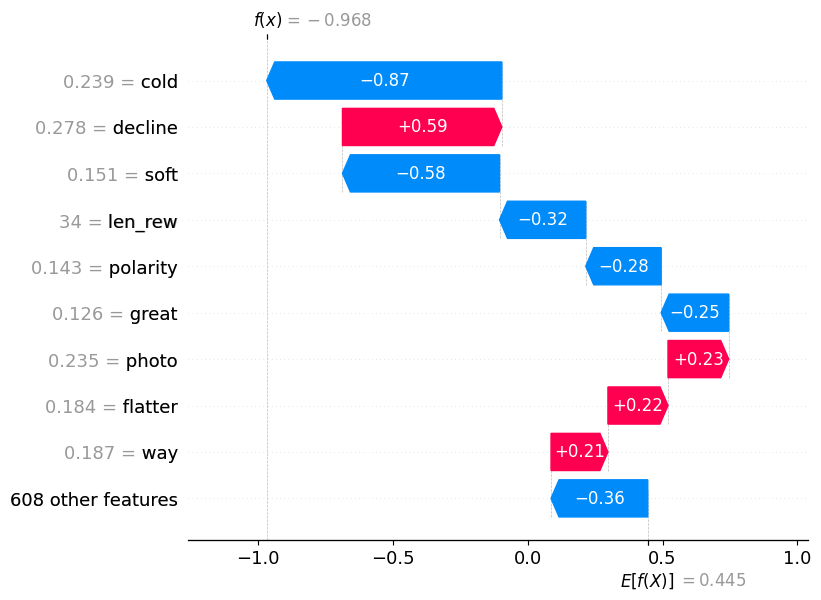

In [262]:
shap.plots.waterfall(shap_values[0][:,0])

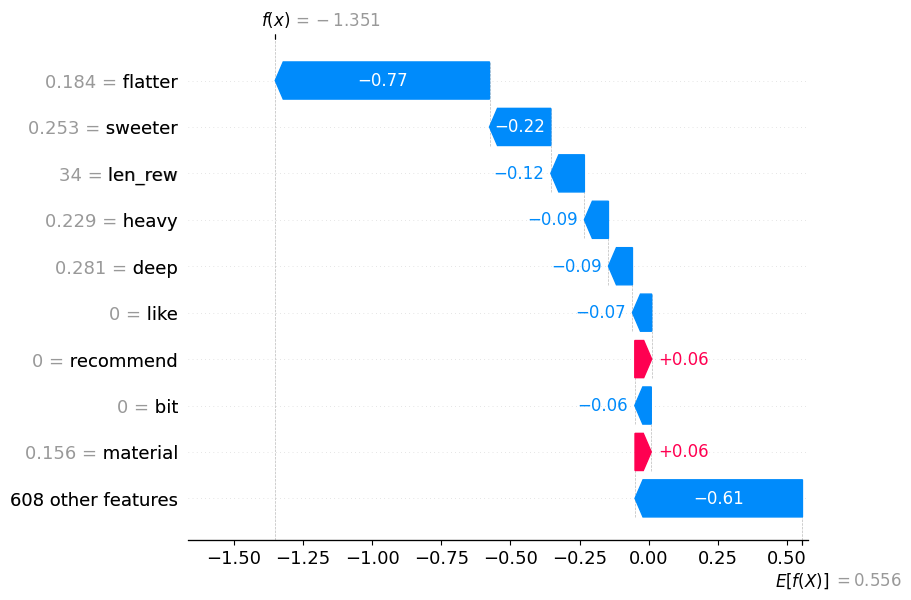

In [263]:
shap.plots.waterfall(shap_values[0][:,1])

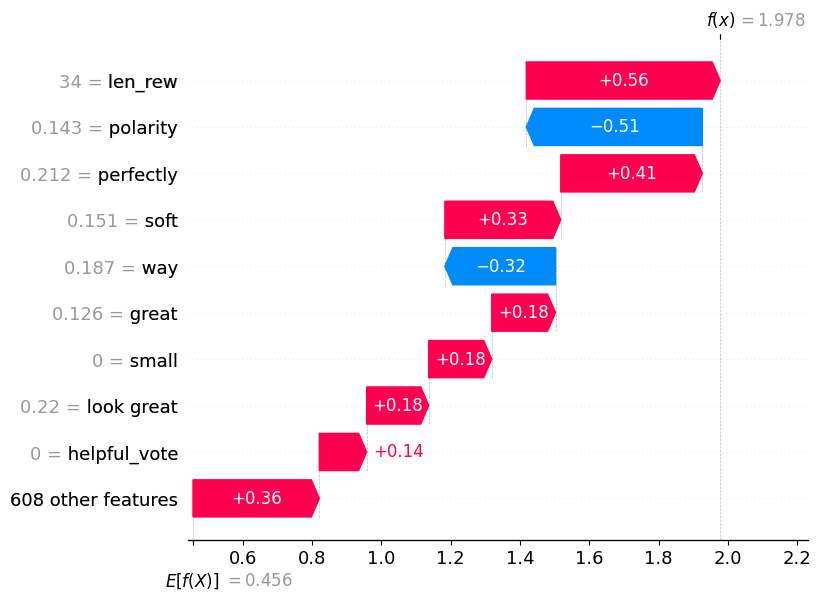

In [264]:
shap.plots.waterfall(shap_values[0][:,2])

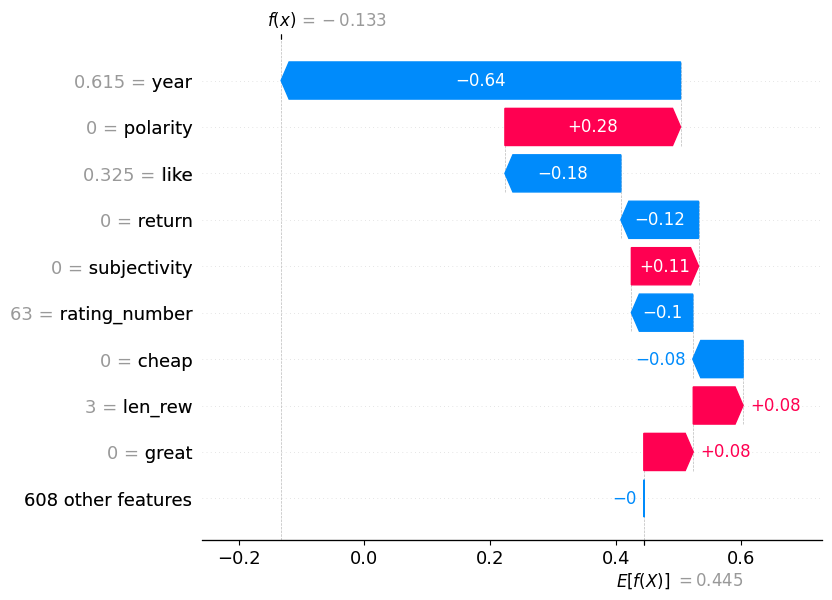

In [265]:
shap.plots.waterfall(shap_values[1][:,0])

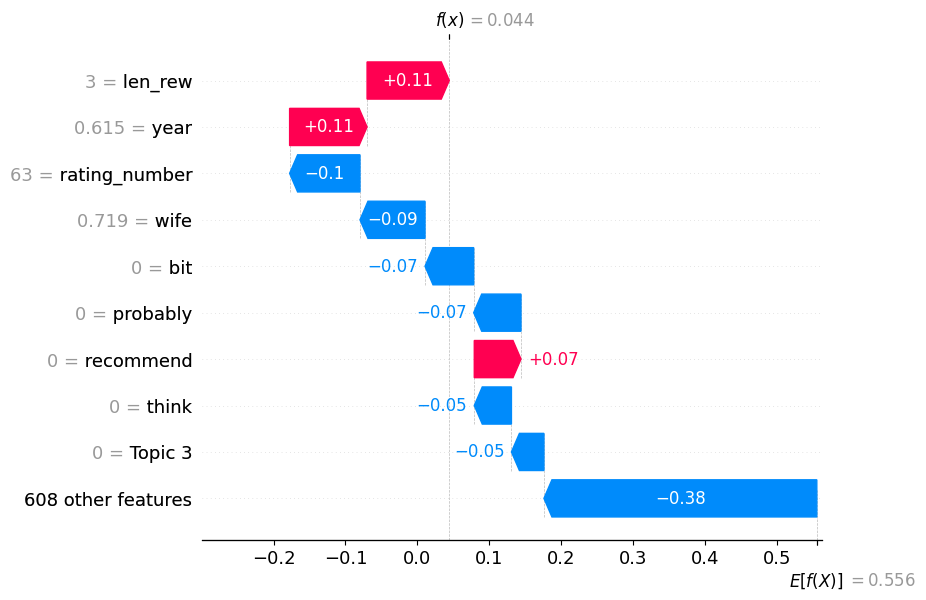

In [266]:
shap.plots.waterfall(shap_values[1][:,1])

In [267]:
shap.plots.waterfall(shap_values[1][:,2])

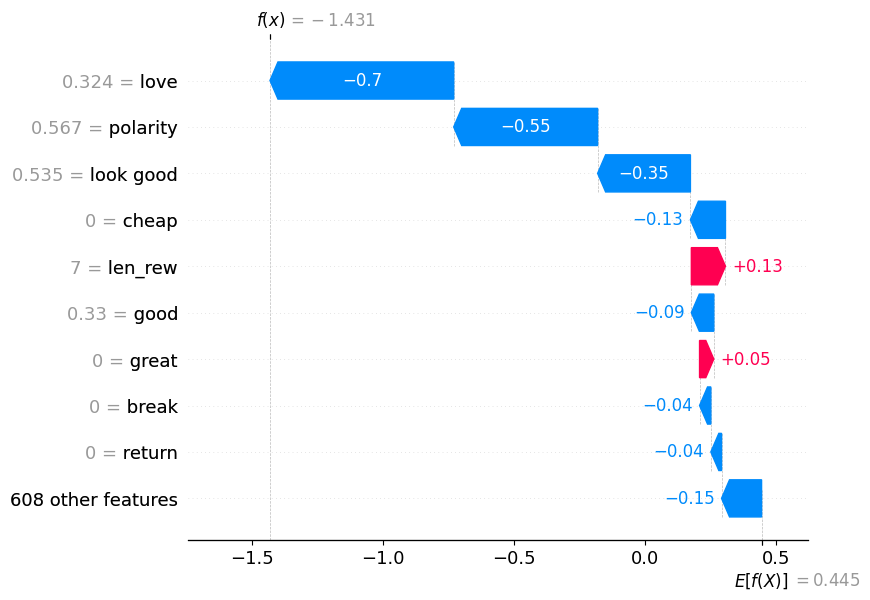

In [268]:
shap.plots.waterfall(shap_values[3][:,0])

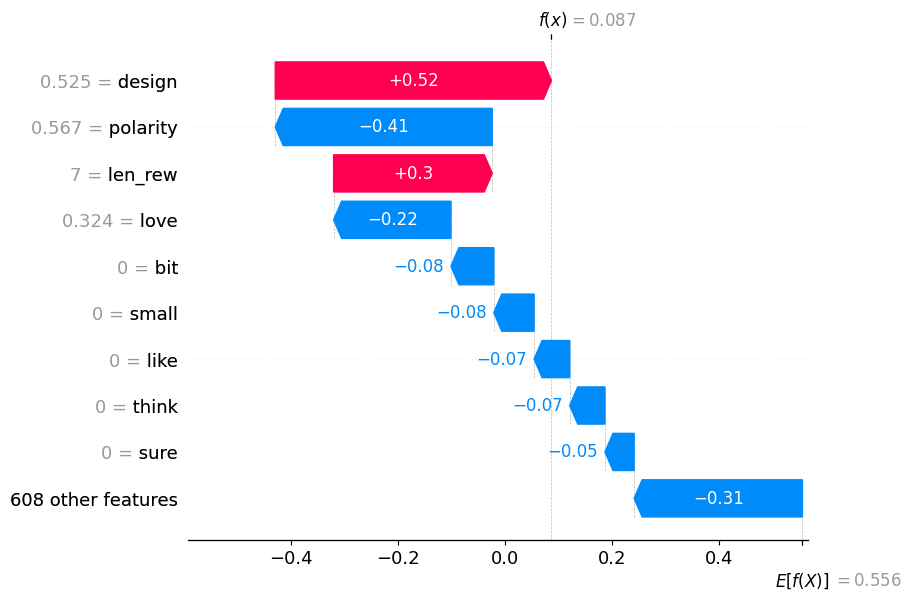

In [269]:
shap.plots.waterfall(shap_values[3][:,1])

In [270]:
shap.plots.waterfall(shap_values[3][:,2])

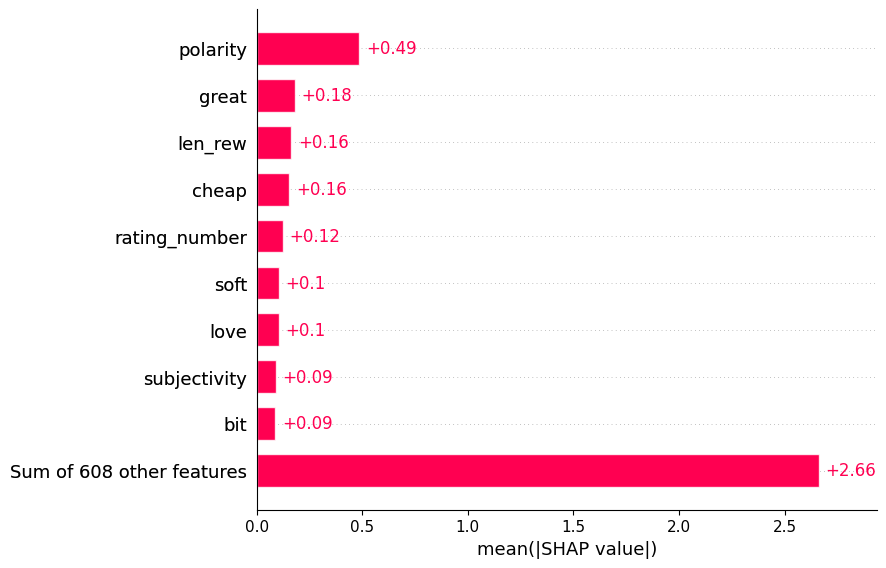

In [271]:
shap.plots.bar(shap_values[:, :, 0])


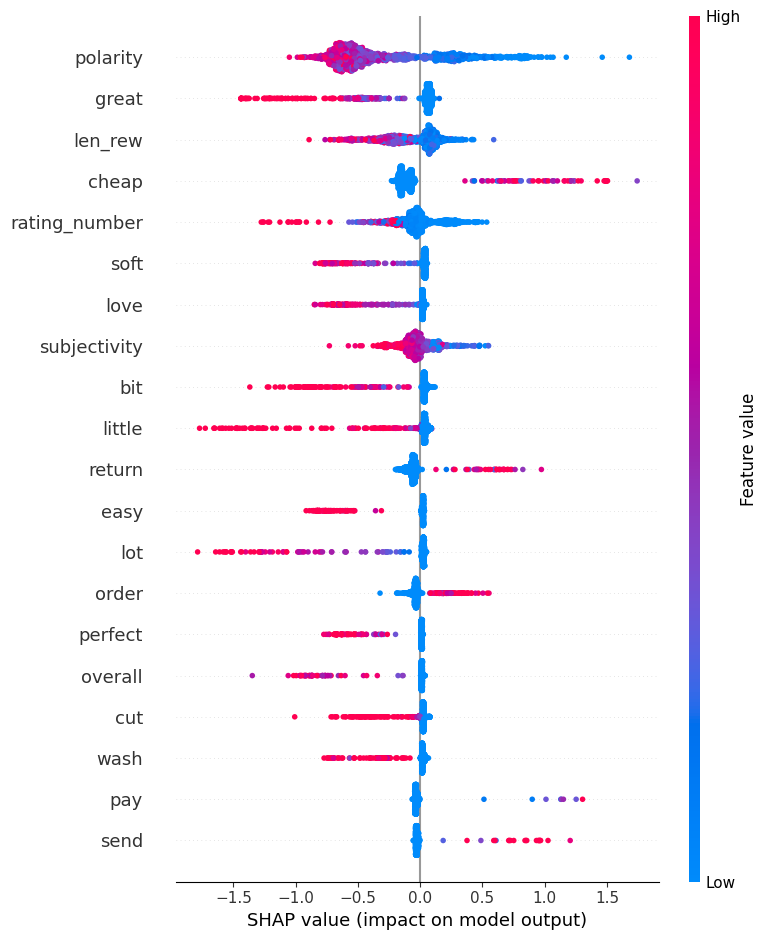

In [272]:
shap.summary_plot(shap_values[:,:,0], x_test, feature_names=x_test.columns)

In [273]:
dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [274]:

def rf_model_output(x_train, y_train, x_test, y_test):
    # Param Grid's
    param_grid = {
        'n_estimators': [10, 50, 100, 200],       
        'max_features': ['sqrt', 'log2'], 
        'max_depth': [None, 10, 20, 30, 40],      
        'min_samples_split': [2, 5, 10],          
        'min_samples_leaf': [1, 2, 4],            
             
    }
    
    rf = RandomForestClassifier()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    # Fit GridSearchCV Model
    grid_search.fit(x_train, y_train)
    
    # Best Recall Score and Parameters
    print("Best Params:", grid_search.best_params_)
    print("Best  Score:", grid_search.best_score_)
    
    # Retrain model with best parameters on the entire training data
    best_params = grid_search.best_params_
    rf_best = RandomForestClassifier(**best_params)
    rf_best.fit(x_train, y_train)
    
    # Predict for test using the best model
    y_pred_rf_best = rf_best.predict(x_test)
    y_prob_rf_best = rf_best.predict_proba(x_test)
    acuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
    f1_score_rf_best = f1_score(y_test, y_pred_rf_best, average= 'macro')
    print(f'Random Forest Best Accuracy Recall: {acuracy_rf_best}')
    print(f'Random Forest F1 Score: {f1_score_rf_best}')
    
    # Displaying Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_rf_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1', 'predicted 2' ],
                yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Random Forest')
    plt.show();



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Params: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best  Score: 0.798
Random Forest Best Accuracy Recall: 0.8006666666666666
Random Forest F1 Score: 0.44193948807631456


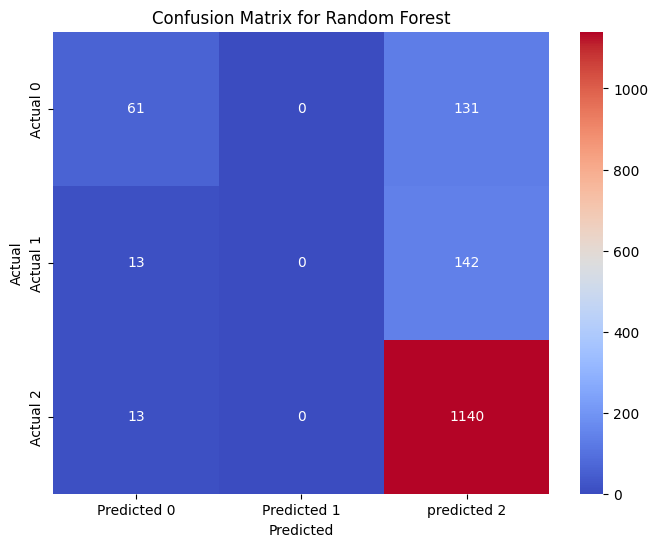

In [275]:
rf_model_output(x_train, y_train, x_test, y_test)

In [276]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [277]:
y_train

4775    2
927     2
3258    2
45      2
1260    2
       ..
3772    2
5191    1
5226    2
5390    2
860     2
Name: sentiment, Length: 4200, dtype: int64

In [278]:
x_train

helpful_vote  rating_number  polarity  subjectivity  able  absolutely  \
4775             5              9  0.415374      0.619062   0.0    0.232903   
927              5              3  0.187284      0.434416   0.0    0.000000   
3258             3              3  0.239063      0.525000   0.0    0.000000   
45               2              1  0.150000      0.650000   0.0    0.000000   
1260             0             33  0.373022      0.599066   0.0    0.000000   
...            ...            ...       ...           ...   ...         ...   
3772             0             26  0.500000      0.550000   0.0    0.000000   
5191             4            164  0.250000      0.694444   0.0    0.000000   
5226             0              2  0.200000      0.200000   0.0    0.000000   
5390             8            275  0.207576      0.513131   0.0    0.000000   
860             13              4  0.230449      0.429487   0.0    0.000000   

      actually       add  adjust  adjustable  adorable  adult  allow  amazon  \
4775       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
927        0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
3258       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
45         0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
1260       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
...        ...       ...     ...         ...       ...    ...    ...     ...   
3772       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
5191       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
5226       0.0  0.000000     0.0         0.0       0.0    0.0    0.0     0.0   
5390       0.0  0.099924     0.0         0.0       0.0    0.0    0.0     0.0   
860        0.0  0.110633     0.0         0.0       0.0    0.0    0.0     0.0   

      ankle     apart  appear  area  arm  arrive  attach  attractive  away  \
4775    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
927     0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
3258    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
45      0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
1260    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
...     ...       ...     ...   ...  ...     ...     ...         ...   ...   
3772    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5191    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5226    0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
5390    0.0  0.130349     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
860     0.0  0.000000     0.0   0.0  0.0     0.0     0.0         0.0   0.0   

      awesome  bad       bag      band       bar  bar size  bar size wear  \
4775      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
927       0.0  0.0  0.000000  0.000000  0.120320  0.142458       0.159215   
3258      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
45        0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
1260      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
...       ...  ...       ...       ...       ...       ...            ...   
3772      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
5191      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
5226      0.0  0.0  0.000000  0.000000  0.000000  0.000000       0.000000   
5390      0.0  0.0  0.299084  0.000000  0.000000  0.000000       0.000000   
860       0.0  0.0  0.000000  0.113326  0.213261  0.126250       0.141101   

      base  beautiful      belt  best       big      bit  bite  black  blend  \
4775   0.0        0.0  0.000000   0.0  0.000000  0.00000   0.0    0.0    0.0   
927    0.0        0.0  0.000000   0.0  0.000000  0.00000   0.0    0.0    0

In [279]:
x_train['polarity'] = x_train['polarity']+1
x_train['subjectivity'] = x_train['subjectivity']+1
x_test['polarity'] = x_test['polarity']+1
x_test['subjectivity'] = x_test['subjectivity']+1

In [280]:
x_train.head()

helpful_vote  rating_number  polarity  subjectivity  able  absolutely  \
4775             5              9  1.415374      1.619062   0.0    0.232903   
927              5              3  1.187284      1.434416   0.0    0.000000   
3258             3              3  1.239062      1.525000   0.0    0.000000   
45               2              1  1.150000      1.650000   0.0    0.000000   
1260             0             33  1.373022      1.599066   0.0    0.000000   

      actually  add  adjust  adjustable  adorable  adult  allow  amazon  \
4775       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
927        0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
3258       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
45         0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   
1260       0.0  0.0     0.0         0.0       0.0    0.0    0.0     0.0   

      ankle  apart  appear  area  arm  arrive  attach  attractive  away  \
4775    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
927     0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
3258    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
45      0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   
1260    0.0    0.0     0.0   0.0  0.0     0.0     0.0         0.0   0.0   

      awesome  bad  bag  band      bar  bar size  bar size wear  base  \
4775      0.0  0.0  0.0   0.0  0.00000  0.000000       0.000000   0.0   
927       0.0  0.0  0.0   0.0  0.12032  0.142458       0.159215   0.0   
3258      0.0  0.0  0.0   0.0  0.00000  0.000000       0.000000   0.0   
45        0.0  0.0  0.0   0.0  0.00000  0.000000       0.000000   0.0   
1260      0.0  0.0  0.0   0.0  0.00000  0.000000       0.000000   0.0   

      beautiful  belt  best  big  bit  bite  black  blend  blue      body  \
4775        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
927         0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.133737   
3258        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
45          0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   
1260        0.0   0.0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.000000   

      boot  box  bracelet  brand  break  breathable  bright  bust  button  \
4775   0.0  0.0       0.0    0.0    0.0         0.0     0.0   0.0     0.0   
927    0.0  0.0       0.0    0.0    0.0         0.0     0.0   0.0     0.0   
3258   0.0  0.0       0.0    0.0    0.0         0.0     0.0   0.0     0.0   
45     0.0  0.0       0.0    0.0    0.0         0.0     0.0   0.0     0.0   
1260   0.0  0.0       0.0    0.0    0.0         0.0     0.0   0.0     0.0   

           buy  card  care  carry      case  casual  cause  chain  change  \
4775  0.159207   0.0   0.0    0.0  0.226054     0.0    0.0    0.0     0.0   
927   0.000000   0.0   0.0    0.0  0.000000     0.0    0.0    0.0     0.0   
3258  0.000000   0.0   0.0    0.0  0.000000     0.0    0.0    0.0     0.0   
45    0.000000   0.0   0.0    0.0  0.000000     0.0    0.0    0.0     0.0   
1260  0.000000   0.0   0.0    0.0  0.000000     0.0    0.0    0.0     0.0   

      chart  cheap  chest  child  choice  christmas  class  clean  \
4775    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
927     0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
3258    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
45      0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   
1260    0.0    0.0    0.0    0.0     0.0        0.0    0.0    0.0   

      clean thought  clean thought trend  close  clothes  clothing  coat  \
4775            0.0                  0.0    0.0      0.0       0.0   0.0   
927             0.0                  0.0    0.0      0.0       0.0   0.0   
3258            0.0                  0.0    0.0      0.0       0.0   0.0   
45              0.0                  0.0    0.0      0.0       0.0   0.0   
1260  

In [281]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [282]:
y_train

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [283]:

def naive_bayes_model_output(x_train, y_train, x_test, y_test):
    # Param Grid's (GaussianNB doesn't have many hyperparameters)
    param_grid = {
         'alpha': [0.1, 0.5, 1.0]
    }
    
    nb = MultinomialNB()
    grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', verbose=1)
    
    # Fit GridSearchCV Model
    grid_search.fit(x_train, y_train)
    
    # Best Recall Score and Parameters
    print("Best Params:", grid_search.best_params_)
    print("Best  Score:", grid_search.best_score_)
    
    # Retrain model with best parameters on the entire training data
    best_params = grid_search.best_params_
    nb_best = MultinomialNB(**best_params)
    nb_best.fit(x_train, y_train)
    
    # Predict for test using the best model
    y_pred_nb_best = nb_best.predict(x_test)
    y_prob_nb_best = nb_best.predict_proba(x_test)
    accuracy_nb_best = accuracy_score(y_test,y_pred_nb_best)
    f1_score_nb_best = f1_score(y_test, y_pred_nb_best, average='macro')
    print(f'Naive Bayes Best Model Accuracy : {accuracy_nb_best}')
    print(f'Naive Bayes Best Model f1 Score: {f1_score_nb_best}')
    print('Naive Bayes Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred_nb_best))
    
    # Displaying Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_nb_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2' ],
                yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params: {'alpha': 0.1}
Best  Score: 0.2688095238095238
Naive Bayes Best Model Accuracy : 0.2688888888888889
Naive Bayes Best Model f1 Score: 0.1917682457224111
Naive Bayes Confusion Matrix: 

 [[ 202    0   39]
 [ 154    1   19]
 [1099    5  281]]


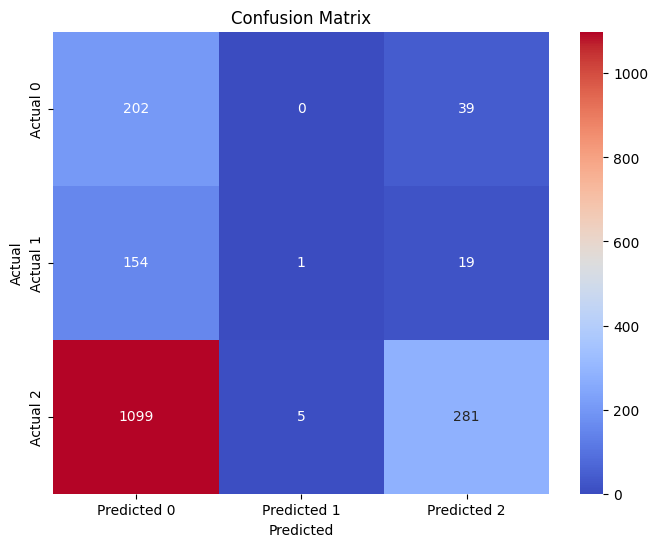

In [284]:
naive_bayes_model_output(x_train, y_train, x_test, y_test)

In [285]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 4775 to 860
Columns: 617 entries, helpful_vote to Topic 3
dtypes: float64(612), int32(2), int64(3)
memory usage: 19.8 MB
